# INDIAN START-UP ECOSYSTEM PROJECT

## Business Understanding

In this project, I am going to focus on the details of funding for these start-ups in India, where I will dive deep into a data containing all the details about fundings received by the start-ups, from 2018 to 2021 and communicate my findings and recommendations to the team in the best way possible.

Some hypotheses I will be testing for this project are as follows;
I will be getting deep into Hypothesis testing later in the project (Outlining the Null and Alternate Hypotheses)

1. Companies with multiple founders are likely to receive higher amounts of funding in India.

2. Sector of the start-up contributes to funding amount.

3. Startup headquarters/location contributes to funding amount.

4. The number of investors affect the funding amount.




I will be focusing on answering the following  business questions:

### Yearly Analysis

- what is the overall trend in funding amounts over the specified time period? 
   - Average and Total funding amount per year
   - Which year had the highest total and average funding amount?

### Analysis by Sector 

- What are the top 5 and botton 5 start-ups according to funding amount and Which sectors are they from?

- Total and Average funding amount by sectors during this timeframe
   - Which sectors has the highest total and average funding during this timeframe?
   - Which sectors has the lowest total and average funding during this timeframe?

- What is the number of fundings by sectors?

### Analysis by location/region

- Total and average funding amounts by locations during this timeframe
   - Which regions have the highest total and average funding during this timeframe?
   - Which regions have the lowest total and average funding during this timeframe?

- What is the number of fundings for each region?

### Analysis by Stages

- Is there a relationship between the development Stage of the startup and the funding it received?

- What is the average number of fundings for each stage?

- What is the average funding amount for each stage?

- What is the Total funding amount per each stage?

### Founder-based Analysis

- How many founders are associated with each company?

- Is there a relationship between the number of founders and the funding amount received?

In [709]:
import pandas as pd

In [710]:
from dotenv import dotenv_values #import dotenv values from dotenv package
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pyodbc
import re
warnings.filterwarnings('ignore')

In [711]:
#Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')

#Get values for credentials in .env

database = environment_variables.get("database")
server = environment_variables.get("server")
username = environment_variables.get("login")
password = environment_variables.get("password")

connection_string = 'DRIVER={ODBC Driver 17 for SQL Server};SERVER={dap-projects-database.database.windows.net};DATABASE={dapDB};UID={LP1_learner};PWD={Hyp0th3s!$T3$t!ng}'

In [712]:
#passing on the conncetion string
connection = pyodbc.connect(connection_string)

In [713]:
#loading 2020 data
db_query = "SELECT * from dbo.LP1_startup_funding2020"
data_three = pd.read_sql(db_query, connection)

data_three['year_collected']=2020
data_three.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10,year_collected
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None,2020
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None,2020
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None,2020
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None,2020
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None,2020


In [714]:
#loading 2021 data
db_query1 = "SELECT * from dbo.LP1_startup_funding2021"
data_four = pd.read_sql(db_query1, connection)

data_four['year_collected']=2021
data_four.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,year_collected
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A,2021
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None,2021
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D,2021
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C,2021
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed,2021


In [715]:
#loading 2019 data
file_path = '..\startup_funding2019.csv'
data_two = pd.read_csv(file_path, encoding='windows-1254')

data_two['year_collected']=2019
data_two.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,year_collected
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN,2019
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C,2019
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding,2019
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D,2019
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN,2019


In [716]:
#loading 2018 data
file_path2 = '..\startup_funding2018.csv'
data_one = pd.read_csv(file_path2)

data_one['year_collected']=2018
data_one.head()

,Company Name,Industry,Round/Series,Amount,Location,About Company,year_collected
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",2018
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,2018
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,2018
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,2018
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,2018


Cleaning 2018 Data

In [717]:
data_one.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Company Name    526 non-null    object
 1   Industry        526 non-null    object
 2   Round/Series    526 non-null    object
 3   Amount          526 non-null    object
 4   Location        526 non-null    object
 5   About Company   526 non-null    object
 6   year_collected  526 non-null    int64 
dtypes: int64(1), object(6)
memory usage: 28.9+ KB


In [718]:
data_one.head()

,Company Name,Industry,Round/Series,Amount,Location,About Company,year_collected
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",2018
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,2018
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,2018
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,2018
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,2018


There is a missing investor column, we can fill investor column as undisclosed since it is unknown

In [719]:
#renaming columns
data_one= data_one.rename(columns=lambda x: x.lower().replace(' ', '_')) 
# add investors column 
data_one["investor"] = "Undisclosed"

#Preview the dataframe
data_one.head()

,company_name,industry,round/series,amount,location,about_company,year_collected,investor
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",2018,Undisclosed
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,2018,Undisclosed
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,2018,Undisclosed
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,2018,Undisclosed
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,2018,Undisclosed


In [720]:
# column rename
rename_columns= {
    "round/series":"stage",
    "about_company":"what_it_does",
    "company_name":"company/brand",
    "industry":"sector"
}
data_one =data_one.rename(columns=rename_columns) 

data_one.head()

,company/brand,sector,stage,amount,location,what_it_does,year_collected,investor
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",2018,Undisclosed
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,2018,Undisclosed
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,2018,Undisclosed
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,2018,Undisclosed
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,2018,Undisclosed


In [721]:
# perform descriptive statistics on the dataset
data_one.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
company/brand,526,525,TheCollegeFever,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sector,526,405,—,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
stage,526,21,Seed,280,NaN,NaN,NaN,NaN,NaN,NaN,NaN
amount,526,198,—,148,NaN,NaN,NaN,NaN,NaN,NaN,NaN
location,526,50,"Bangalore, Karnataka, India",102,NaN,NaN,NaN,NaN,NaN,NaN,NaN
what_it_does,526,524,"TheCollegeFever is a hub for fun, fiesta and f...",2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year_collected,526.0,NaN,NaN,NaN,2018.0,0.0,2018.0,2018.0,2018.0,2018.0,2018.0
investor,526,1,Undisclosed,526,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [722]:
#check for missing values
data_one.isna().sum()

company/brand     0
sector            0
stage             0
amount            0
location          0
what_it_does      0
year_collected    0
investor          0
dtype: int64

In [723]:
#check for duplicates
data_one.duplicated().sum()

1

In [724]:
#drop the duplicate value
data_one.drop_duplicates(inplace=True)

Cleaning the amount column

In [725]:
# identifying unique values in the amount column
data_one["amount"].unique()

array(['250000', '₹40,000,000', '₹65,000,000', '2000000', '—', '1600000',
       '₹16,000,000', '₹50,000,000', '₹100,000,000', '150000', '1100000',
       '₹500,000', '6000000', '650000', '₹35,000,000', '₹64,000,000',
       '₹20,000,000', '1000000', '5000000', '4000000', '₹30,000,000',
       '2800000', '1700000', '1300000', '₹5,000,000', '₹12,500,000',
       '₹15,000,000', '500000', '₹104,000,000', '₹45,000,000', '13400000',
       '₹25,000,000', '₹26,400,000', '₹8,000,000', '₹60,000', '9000000',
       '100000', '20000', '120000', '₹34,000,000', '₹342,000,000',
       '$143,145', '₹600,000,000', '$742,000,000', '₹1,000,000,000',
       '₹2,000,000,000', '$3,980,000', '$10,000', '₹100,000',
       '₹250,000,000', '$1,000,000,000', '$7,000,000', '$35,000,000',
       '₹550,000,000', '$28,500,000', '$2,000,000', '₹240,000,000',
       '₹120,000,000', '$2,400,000', '$30,000,000', '₹2,500,000,000',
       '$23,000,000', '$150,000', '$11,000,000', '₹44,000,000',
       '$3,240,000', '₹60

In [726]:
#creating a function in the amount column

exchange_rate = 68.41 #this average exchange rate of dollar to rupee in 2018

def clean_amount():
    # copy original amount columns
    amount_column = data_one["amount"].copy().str.replace(",","") 
    # extract values in Rupees(₹)
    amount_in_rupee = amount_column[amount_column.str.startswith("₹")]
    # remove the ₹ symbol
    amount_in_rupee = amount_in_rupee.str.lstrip("₹")
    # convert the amount in rupee to USD by the exchange rate of 68.41
    amount_in_rupee = amount_in_rupee.apply(lambda x: float(x)/exchange_rate)
    # extract values in dollars($)
    amount_in_dollar = amount_column[amount_column.str.startswith("$")]
    # remove the dollar symbol
    amount_in_dollar = amount_in_dollar.str.lstrip("$")
    # Replace the Unclean columns with the clean one
    amount_column.loc[amount_in_rupee.index] = amount_in_rupee
    amount_column.loc[amount_in_dollar.index] = amount_in_dollar
    
    # convert the clean column to numeric
    amount_column = pd.to_numeric(amount_column,errors="coerce")
    # update the amount column 
    data_one["amount"] = amount_column

clean_amount()

In [727]:
# perform a discriptive statistics on the new dataset
data_one.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
company/brand,525,525,TheCollegeFever,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sector,525,405,—,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
stage,525,21,Seed,279,NaN,NaN,NaN,NaN,NaN,NaN,NaN
amount,377.0,NaN,NaN,NaN,17620773.658718,77978171.896398,877.064757,500000.0,1300000.0,5000000.0,1000000000.0
location,525,50,"Bangalore, Karnataka, India",101,NaN,NaN,NaN,NaN,NaN,NaN,NaN
what_it_does,525,524,Algorithmic trading platform.,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year_collected,525.0,NaN,NaN,NaN,2018.0,0.0,2018.0,2018.0,2018.0,2018.0,2018.0
investor,525,1,Undisclosed,525,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There is a vast difference between the mean and the median of the amount column which suggests outliers present in the dataset.

Therefore:
Fillna Values in the amount column:Impute the NaN values in the amount column with the median because of the outliers

Cleaning the stage column to further enhance changes in the amount column

In [728]:
data_one.stage.unique()

array(['Seed', 'Series A', 'Angel', 'Series B', 'Pre-Seed',
       'Private Equity', 'Venture - Series Unknown', 'Grant',
       'Debt Financing', 'Post-IPO Debt', 'Series H', 'Series C',
       'Series E', 'Corporate Round', 'Undisclosed',
       'https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593',
       'Series D', 'Secondary Market', 'Post-IPO Equity',
       'Non-equity Assistance', 'Funding Round'], dtype=object)

In [729]:
#Clean the Stage column categorize them
 
adjusted_stage = {
    'Seed': 'Seed funding',
    'Angel': 'Seed funding',
    'Venture - Series Unknown': 'Series A',
    'Debt Financing': 'Series A',
    'Grant': 'Seed funding',
    'Pre-Seed': 'Pre-Seed funding',
    'Funding Round': 'Pre-Seed funding',
    'Fresh funding': 'Pre-Seed funding',
    'Pre series A': 'Series A',
    'Post series A': 'Series A',
    'Seed fund': 'Seed funding',
    'Series B+': 'Series B',
    'Seed round': 'Seed funding',
    'Pre-seed' : 'Pre-Seed funding',
    'Seed A': 'Seed funding',
    'Pre-series A' : 'Series A',
    'Pre-series' : 'Pre-Seed funding',
    'Pre-series C' : 'Series C',
    'Pre-series B' : 'Series B',
    'Pre- series A' : 'Series A',
    'Pre-Series B' : 'Series B',
    'Series A-1' : 'Series A',
    'Seies A': 'Series A',
    'Seed Funding' : 'Seed funding',
    'Pre-Seed' : 'Pre-Seed funding',
    'Seed round': 'Seed funding' ,
    'Pre-seed Round': 'Pre-Seed funding',
    'Pre Series A' : 'Series A',
    'Pre seed Round': 'Pre-Seed funding',
    'Angel Round' :  'Seed funding',
    'Pre series A1': 'Series A',
    'Pre series A' : 'Series A',
    'Seed Round' : 'Seed funding',
    'Pre seed round' : 'Pre-Seed funding',
    'Pre series B' : 'Series B',
    'Pre series C' : 'Series B',
    'Seed Investment': 'Seed funding',
    'Seed+' : 'Seed funding',
    'Series A+' : 'Series A',
    'PE' : 'Private Equity',
    'Pre-series A1' : 'Series A',
    'Early seed' : 'Pre-Seed funding',
    'Series B2' : 'Series B',
    'Series E2' : 'Series E',
    'Series D1' : 'Series D',
    'Series B3' : 'Series B',
    'Series F1' : 'Series F',
    'Series A2' : 'Series A',
    'Series F2':'Series F',
    'Series C, D': 'Series C',
    'Bridge Round': 'Bridge',
    'https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593' : None,
    'ah! Ventures':'Series A', 
    'ITO Angel Network, LetsVenture': 'Seed funding',
    'JITO Angel Network, LetsVenture': 'Seed Funding', 
}

In [730]:
# Replacing the sector column values with the new sectors
data_one["stage"]= data_one["stage"].replace(adjusted_stage)
data_one.stage.unique()

array(['Seed funding', 'Series A', 'Series B', 'Pre-Seed funding',
       'Private Equity', 'Post-IPO Debt', 'Series H', 'Series C',
       'Series E', 'Corporate Round', 'Undisclosed', None, 'Series D',
       'Secondary Market', 'Post-IPO Equity', 'Non-equity Assistance'],
      dtype=object)

In [731]:
# Function to fill NaN values in the amount column with the average based on stage of company
def impute_amount_column(df,filter_name,fill_value):
    unique_values = df[filter_name].unique()
    for val, avg_amount in zip(unique_values,df.groupby(filter_name)[fill_value].transform('median')):
        df.loc[df[filter_name] == val, fill_value] = df.loc[df[filter_name] == val, fill_value].fillna(avg_amount)
    return df

# call the impute_amount_column
impute_amount_column(data_one,"stage","amount")

,company/brand,sector,stage,amount,location,what_it_does,year_collected,investor
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed funding,2.500000e+05,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",2018,Undisclosed
1,Happy Cow Dairy,"Agriculture, Farming",Seed funding,5.847098e+05,"Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,2018,Undisclosed
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,9.501535e+05,"Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,2018,Undisclosed
3,PayMe India,"Financial Services, FinTech",Seed funding,2.000000e+06,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,2018,Undisclosed
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed funding,5.673549e+05,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,2018,Undisclosed
...,...,...,...,...,...,...,...,...
521,Udaan,"B2B, Business Development, Internet, Marketplace",Series C,2.250000e+08,"Bangalore, Karnataka, India","Udaan is a B2B trade platform, designed specif...",2018,Undisclosed
522,Happyeasygo Group,"Tourism, Travel",Series A,5.673549e+05,"Haryana, Haryana, India",HappyEasyGo is an online travel domain.,2018,Undisclosed
523,Mombay,"Food and Beverage, Food Delivery, Internet",Seed funding,7.500000e+03,"Mumbai, Maharashtra, India",Mombay is a unique opportunity for housewives ...,2018,Undisclosed
524,Droni Tech,Information Technology,Seed funding,5.116211e+05,"Mumbai, Maharashtra, India",Droni Tech manufacture UAVs and develop softwa...,2018,Undisclosed


In [732]:
#check for nulls in the amount column
data_one["amount"].isnull().sum()

0

In [733]:
# convert the amount column to integer
data_one['amount'] = data_one['amount'].astype(int)

Cleaning the Industry/ Sector Column 

In [734]:
# Checking for empty values in the sector column
empty_sector_bool = data_one['sector'] == '—'
empty_sector = data_one.loc[empty_sector_bool]
empty_sector

,company/brand,sector,stage,amount,location,what_it_does,year_collected,investor
58,MissMalini Entertainment,—,Seed funding,1520245,"Mumbai, Maharashtra, India",MissMalini Entertainment is a multi-platform n...,2018,Undisclosed
105,Jagaran Microfin,—,Series A,8039760,"Kolkata, West Bengal, India",Jagaran Microfin is a Microfinance institution...,2018,Undisclosed
121,FLEECA,—,Seed funding,567354,"Jaipur, Rajasthan, India",FLEECA is a Tyre Care Provider company.,2018,Undisclosed
146,WheelsEMI,—,Series B,14000000,"Pune, Maharashtra, India","WheelsEMI is the brand name of NBFC, WheelsEMI...",2018,Undisclosed
153,Fric Bergen,—,Series A,567354,"Alwar, Rajasthan, India",Fric Bergen is a leader in the specialty food ...,2018,Undisclosed
174,Deftouch,—,Seed funding,567354,"Bangalore, Karnataka, India",Deftouch is a mobile game development company ...,2018,Undisclosed
181,Corefactors,—,Seed funding,567354,"Bangalore, Karnataka, India","Corefactors is a leading campaign management, ...",2018,Undisclosed
210,Cell Propulsion,—,Seed funding,102324,"Bangalore, Karnataka, India",Cell Propulsion is an electric mobility startu...,2018,Undisclosed
230,Flathalt,—,Seed funding,50000,"Gurgaon, Haryana, India",FInd your Customized Home here.,2018,Undisclosed
235,dishq,—,Seed funding,400000,"Bengaluru, Karnataka, India",dishq leverages food science and machine learn...,2018,Undisclosed


In [735]:
# identifying empty rows in the sector column
empty_sector.shape[0]

30

In [736]:
#using 'what_it_does' section to assign the 30 rows to their correct sector

empty_sector[['sector', 'what_it_does']]

,sector,what_it_does
58,—,MissMalini Entertainment is a multi-platform n...
105,—,Jagaran Microfin is a Microfinance institution...
121,—,FLEECA is a Tyre Care Provider company.
146,—,"WheelsEMI is the brand name of NBFC, WheelsEMI..."
153,—,Fric Bergen is a leader in the specialty food ...
174,—,Deftouch is a mobile game development company ...
181,—,"Corefactors is a leading campaign management, ..."
210,—,Cell Propulsion is an electric mobility startu...
230,—,FInd your Customized Home here.
235,—,dishq leverages food science and machine learn...


In [737]:
# Filling them in manually
data_one.loc[58, 'sector'] = 'Entertainment'
data_one.loc[105, 'sector'] = 'Finance'
data_one.loc[121, 'sector'] = 'Automotive'
data_one.loc[146, 'sector'] = 'Automotive'
data_one.loc[153, 'sector'] = 'Food'
data_one.loc[174, 'sector'] = 'IT & Technology'
data_one.loc[181, 'sector'] = 'Finance'
data_one.loc[210, 'sector'] = 'Automotive'
data_one.loc[230, 'sector'] = 'Real Estate'
data_one.loc[235, 'sector'] = 'IT & Technology'
data_one.loc[238, 'sector'] = 'IT & Technology'
data_one.loc[242, 'sector'] = 'Real Estate'
data_one.loc[243, 'sector'] = 'IT & Technology'
data_one.loc[247, 'sector'] = 'IT & Technology'
data_one.loc[251, 'sector'] = 'Wellness'
data_one.loc[257, 'sector'] = 'Marketing'
data_one.loc[258, 'sector'] = 'Marketing'
data_one.loc[259, 'sector'] = 'E-Commerce'
data_one.loc[257, 'sector'] = 'Marketing'
data_one.loc[294, 'sector'] = 'Transportation'
data_one.loc[325, 'sector'] = 'IT & Technology'
data_one.loc[326, 'sector'] = 'Finance'
data_one.loc[346, 'sector'] = 'Finance'
data_one.loc[398, 'sector'] = 'Finance'
data_one.loc[457, 'sector'] = 'Agriculture'
data_one.loc[472, 'sector'] = 'IT & Technology'
data_one.loc[473, 'sector'] = 'IT & Technology'
data_one.loc[476, 'sector'] = 'IT & Technology'
data_one.loc[478, 'sector'] = 'Wellness/Beauty'
data_one.loc[480, 'sector'] = 'Hospitality'
data_one.loc[510, 'sector'] = 'IT & Technology'

In [738]:
#creating a list containing all the rows in the sector column with multiple values

multiple_sectors = [sect for sect in list(data_one['sector']) if ',' in sect]
multiple_sectors

['Brand Marketing, Event Promotion, Marketing, Sponsorship, Ticketing',
 'Agriculture, Farming',
 'Credit, Financial Services, Lending, Marketplace',
 'Financial Services, FinTech',
 'E-Commerce Platforms, Retail, SaaS',
 'Cloud Infrastructure, PaaS, SaaS',
 'Internet, Leisure, Marketplace',
 'Information Services, Information Technology',
 'B2B, Shoes',
 'Apps, Collaboration, Developer Platform, Enterprise Software, Messaging, Productivity Tools, Video Chat',
 'Automotive, Search Engine, Service Industry',
 'Finance, Internet, Travel',
 'Accounting, Business Information Systems, Business Travel, Finance, SaaS',
 'Artificial Intelligence, Product Search, SaaS, Service Industry, Software',
 'Internet of Things, Waste Management',
 'Air Transportation, Freight Service, Logistics, Marine Transportation',
 'Enterprise Software, Health Care, Hospital, Parenting, Personal Health, SaaS',
 'Agriculture, Analytics, Big Data, Farming',
 'Logistics, Supply Chain Management',
 'Financial Services,

In [739]:
# create a list of substrings
tech = ['Mobile','Technology', 'Internet', 'Software', 'Hardware','SaaS','Blockchain','Apps','Information Services','SEM',
        'Artificial Intelligence','CleanTech','Aerospace','Robotics','Ai','PaaS','Medtech','Agritech','HR tech',
       'Tech','FoodTech','Safety tech','IoT','Legal tech','Infratech','Netwokring platform','Telecommunication','Cloud','Aero',
       'Virtual','Content','Photonics','app','Proptech','Deeptech','AR','VR','Agri tech','-Tech','AgriTech','IT','Network',
        'Data','HrTech','Foodtech','Spacetech','E-mobility','Automation','Logitech','HRTech','Drone','MLOps','Innovation',
       'BioTechnology','TaaS','network','equipment','SpaceTech','CRM','MarTech','Nanotechnology','Femtech','startup','AI', 'IT & Technology']
fin = ['Lending','Finance','Insurance', 'Payments','Financial Services','Credit','Credit Cards','Mutual Funds',
       'Banking','Escrow','Venture','financial','Taxation','Capital','firm','Equity']
fint = ['NFT','Virtual Banking','FinTech','Fintech','Cryptocurrency','Crypto','Insurtech','InsurTech']
health = ['Health', 'Medical','Pharmaceutical','Health Diagnotics','Health Care','Hospital','Biotechnology','Biopharma',
         'Hygiene management','HealthTech','Healthcare','HealthCare','laboratory','Biotech','Healthtech','HeathTech',
         'Helathcare','Veterinary']
mkt = ['Brand Marketing','Marketing','Event Promotion','Market']
agric = ['Farming','Agriculture','Nutrition','Hauz Khas','Fishery']
con = ['Food','Food and Beverages','Dairy','Beverages','Beer','FMCG']
econ = ['B2B','Shopping','E-Commerce','Trading Platform','E-commerce','E-marketplace','marketplace','e-commerce','Ecommerce',
        'E-market','Commerce','Trading platform']
cons = ['Wholesale','Consumer','Shoes','Packaging','Retail','Consulting','Food Delivery']
edu = ['E-Learning','EdTech','Education','Communities','Edtech','Preschool','School']
welln = ['Lifestyle','Beauty','Wellness','Cosmetics','Yoga','Skincare','D2C','Fitness','Lifestyle','Training']
real_est=['Real Estate','Home Decor','Accomodation','Interior design','Home Design','Home interior','Co-living',
          'Construction']
log = ['Logistics','Rental','Tourism','Travel','TravelTech','Transport','Transportation','Aviation','Mobility']

auto = ['Automotive','Electric vehicle','Industrial Automation','Vehicles','Automotive tech','Automobile','Tyre','car','Car',
       'Vehicle','Mechanical']
manu = ['Manufacturing']
ener = ['Renewable Energy','Solar','Energy','Energy Storage','Battery','Oil and Gas','Renewable','EV','Electricity',
       'purification','Renewables']
medi = ['Entertainment','Media','News','Video','Digital Media','FM','Publication','OTT','Social Network','Music',
        'Digital platform','Podcast','publishing','Blogging']
game = ['Gaming','Games','Sports']

style = ['Fashion','Jewelry','Eyeglasses','Eye Wear','Apparel','Dating','Celebrity','Eyewear','D2C Fashion','Matrimony',
         'Textiles','D2C jewellery','Foootwear','Arts']
hos =['Hospitality','Hotel','Leisure']

# create a new_sector column
data_one['new_sector'] = 'Other'

# Use str.contains to create a mask for rows where 'sector' contains any of the terms
# Join the terms in 'tech' with '|' to create a regex pattern
data_one.loc[data_one['sector'].str.contains('|'.join(tech)), 'new_sector'] = 'IT & Technology'
data_one.loc[data_one['sector'].str.contains('|'.join(fin)), 'new_sector'] = 'Finance'
data_one.loc[data_one['sector'].str.contains('|'.join(health)), 'new_sector'] = 'Healthcare'
data_one.loc[data_one['sector'].str.contains('|'.join(mkt)), 'new_sector'] = 'Marketing'
data_one.loc[data_one['sector'].str.contains('|'.join(agric)), 'new_sector'] = 'Agriculture'
data_one.loc[data_one['sector'].str.contains('|'.join(econ)), 'new_sector'] = 'E-Commerce'
data_one.loc[data_one['sector'].str.contains('|'.join(edu)), 'new_sector'] = 'Education'
data_one.loc[data_one['sector'].str.contains('|'.join(welln)), 'new_sector'] = 'Wellness/Beauty'
data_one.loc[data_one['sector'].str.contains('|'.join(real_est)), 'new_sector'] = 'Real Estate'
data_one.loc[data_one['sector'].str.contains('|'.join(log)), 'new_sector'] = 'Logistics'

data_one.loc[data_one['sector'].str.contains('|'.join(auto)), 'new_sector'] = 'Automotive'
data_one.loc[data_one['sector'].str.contains('|'.join(manu)), 'new_sector'] = 'Manufacture'
data_one.loc[data_one['sector'].str.contains('|'.join(ener)), 'new_sector'] = 'Energy'
data_one.loc[data_one['sector'].str.contains('|'.join(medi)), 'new_sector'] = 'Media/Entertainment'
data_one.loc[data_one['sector'].str.contains('|'.join(hos)), 'new_sector'] = 'Hospitality'
data_one.loc[data_one['sector'].str.contains('|'.join(style)), 'new_sector'] = 'Lifestyle'
data_one.loc[data_one['sector'].str.contains('|'.join(cons)), 'new_sector'] = 'Consumer Services'
data_one.loc[data_one['sector'].str.contains('|'.join(game)), 'new_sector'] = 'Gaming'
data_one.loc[data_one['sector'].str.contains('|'.join(fint)), 'new_sector'] = 'FinTech'
data_one.loc[data_one['sector'].str.contains('|'.join(con)), 'new_sector'] = 'Consumables'

In [740]:
data_one.drop('sector',axis=1,inplace=True)
data_one= data_one.rename(columns={'new_sector': 'sector'})

data_one.head()

,company/brand,stage,amount,location,what_it_does,year_collected,investor,sector
0,TheCollegeFever,Seed funding,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",2018,Undisclosed,Marketing
1,Happy Cow Dairy,Seed funding,584709,"Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,2018,Undisclosed,Agriculture
2,MyLoanCare,Series A,950153,"Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,2018,Undisclosed,Marketing
3,PayMe India,Seed funding,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,2018,Undisclosed,FinTech
4,Eunimart,Seed funding,567354,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,2018,Undisclosed,Consumer Services


In [741]:
data_one["sector"].value_counts()

sector
IT & Technology        77
Automotive             74
Finance                55
Consumer Services      36
Logistics              34
Education              34
Consumables            33
Media/Entertainment    28
FinTech                25
E-Commerce             18
Gaming                 15
Energy                 14
Marketing              14
Lifestyle              11
Healthcare             11
Agriculture             9
Hospitality             9
Real Estate             9
Wellness/Beauty         8
Other                   8
Manufacture             3
Name: count, dtype: int64

Cleaning the location Column

In [742]:
# identify unique values in the loaction column
data_one["location"].unique()

array(['Bangalore, Karnataka, India', 'Mumbai, Maharashtra, India',
       'Gurgaon, Haryana, India', 'Noida, Uttar Pradesh, India',
       'Hyderabad, Andhra Pradesh, India', 'Bengaluru, Karnataka, India',
       'Kalkaji, Delhi, India', 'Delhi, Delhi, India', 'India, Asia',
       'Hubli, Karnataka, India', 'New Delhi, Delhi, India',
       'Chennai, Tamil Nadu, India', 'Mohali, Punjab, India',
       'Kolkata, West Bengal, India', 'Pune, Maharashtra, India',
       'Jodhpur, Rajasthan, India', 'Kanpur, Uttar Pradesh, India',
       'Ahmedabad, Gujarat, India', 'Azadpur, Delhi, India',
       'Haryana, Haryana, India', 'Cochin, Kerala, India',
       'Faridabad, Haryana, India', 'Jaipur, Rajasthan, India',
       'Kota, Rajasthan, India', 'Anand, Gujarat, India',
       'Bangalore City, Karnataka, India', 'Belgaum, Karnataka, India',
       'Thane, Maharashtra, India', 'Margão, Goa, India',
       'Indore, Madhya Pradesh, India', 'Alwar, Rajasthan, India',
       'Kannur, Kerala, Ind

In [743]:
#inputing only one the cities in location column
data_one['location'] = data_one['location'].apply(lambda x: x.split(',')[0])
data_one.head()

,company/brand,stage,amount,location,what_it_does,year_collected,investor,sector
0,TheCollegeFever,Seed funding,250000,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",2018,Undisclosed,Marketing
1,Happy Cow Dairy,Seed funding,584709,Mumbai,A startup which aggregates milk from dairy far...,2018,Undisclosed,Agriculture
2,MyLoanCare,Series A,950153,Gurgaon,Leading Online Loans Marketplace in India,2018,Undisclosed,Marketing
3,PayMe India,Seed funding,2000000,Noida,PayMe India is an innovative FinTech organizat...,2018,Undisclosed,FinTech
4,Eunimart,Seed funding,567354,Hyderabad,Eunimart is a one stop solution for merchants ...,2018,Undisclosed,Consumer Services


In [744]:
# making the necessary changes
# replace "Bengaluru" with "Bangalore" in the "headquarter" column
data_one['location'] = data_one['location'].str.replace('Bengaluru', 'Bangalore')
data_one['location'] = data_one['location'].str.replace('Bangalore City', 'Bangalore')
data_one['location'] = data_one['location'].str.replace('New Delhi', 'Delhi')
data_one['location'] = data_one['location'].str.replace('Gurgaon', 'Gurugram')

In [745]:
#renaming location column to 'headquarter' to matching the rest of the column names
data_one = data_one.rename(columns={'location': 'headquarter'})
data_one.head()

,company/brand,stage,amount,headquarter,what_it_does,year_collected,investor,sector
0,TheCollegeFever,Seed funding,250000,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",2018,Undisclosed,Marketing
1,Happy Cow Dairy,Seed funding,584709,Mumbai,A startup which aggregates milk from dairy far...,2018,Undisclosed,Agriculture
2,MyLoanCare,Series A,950153,Gurugram,Leading Online Loans Marketplace in India,2018,Undisclosed,Marketing
3,PayMe India,Seed funding,2000000,Noida,PayMe India is an innovative FinTech organizat...,2018,Undisclosed,FinTech
4,Eunimart,Seed funding,567354,Hyderabad,Eunimart is a one stop solution for merchants ...,2018,Undisclosed,Consumer Services


Cleaning the 2019 Dataset

In [746]:
data_two.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,year_collected
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN,2019
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C,2019
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding,2019
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D,2019
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN,2019


In [747]:
data_two.shape

(89, 10)

In [748]:
data_two.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,year_collected
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN,2019
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C,2019
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding,2019
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D,2019
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN,2019


In [749]:
#check for duplicates
data_two.duplicated().sum()

0

In [750]:
# perform a descriptive stattics on the dataset
data_two.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Company/Brand,89,87,Kratikal,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Founded,60.0,NaN,NaN,NaN,2014.533333,2.937003,2004.0,2013.0,2015.0,2016.25,2019.0
HeadQuarter,70,17,Bangalore,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sector,84,52,Edtech,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
What it does,89,88,Online meat shop,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Founders,86,85,"Vivek Gupta, Abhay Hanjura",2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Investor,89,86,Undisclosed,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Amount($),89,50,Undisclosed,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stage,43,15,Series A,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year_collected,89.0,NaN,NaN,NaN,2019.0,0.0,2019.0,2019.0,2019.0,2019.0,2019.0


In [751]:
#check for null values
data_two.isna().sum()

Company/Brand      0
Founded           29
HeadQuarter       19
Sector             5
What it does       0
Founders           3
Investor           0
Amount($)          0
Stage             46
year_collected     0
dtype: int64

Cleaning the Sector Column

In [753]:
# Let's look at where sector is empty
data_two.loc[(data_two['Sector'].isna()==True)]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,year_collected
41,VMate,NaN,NaN,NaN,A short video platform,NaN,Alibaba,"$100,000,000",NaN,2019
49,Awign Enterprises,2016.0,Bangalore,NaN,It supplies workforce to the economy,"Annanya Sarthak, Gurpreet Singh, Praveen Sah","Work10M, Michael and Susan Dell Foundation, Ea...","$4,000,000",Series A,2019
52,TapChief,2016.0,Bangalore,NaN,It connects individuals in need of advice in a...,"Shashank Murali, Binay Krishna, Arjun Krishna",Blume Ventures.,"$1,500,000",Pre series A,2019
56,KredX,NaN,Bangalore,NaN,Invoice discounting platform,Manish Kumar,Tiger Global Management,"$26,000,000",Series B,2019
57,m.Paani,NaN,Mumbai,NaN,It digitizes and organises local retailers,Akanksha Hazari,"AC Ventures, Henkel","$5,500,000",Series A,2019


In [754]:
#manually entering the rows for the column using 'what it does' column
data_two.loc[41, 'Sector'] = 'Media'
data_two.loc[49, 'Sector'] = 'Human Resources'
data_two.loc[52, 'Sector'] = 'IT & Technology'
data_two.loc[56, 'Sector'] = 'IT & Technology'
data_two.loc[57, 'Sector'] = 'E-Commerce'

In [755]:
# Now I will go ahead and use the substrings I created to earlier for the 'Sector' column to enter new sectors for 2019
data_two['sector_new'] = 'Other'
data_two.loc[data_two['Sector'].str.contains('|'.join(tech)), 'sector_new'] = 'IT & Technology'
data_two.loc[data_two['Sector'].str.contains('|'.join(fin)), 'sector_new'] = 'Finance'
data_two.loc[data_two['Sector'].str.contains('|'.join(health)), 'sector_new'] = 'Healthcare'
data_two.loc[data_two['Sector'].str.contains('|'.join(mkt)), 'sector_new'] = 'Marketing'
data_two.loc[data_two['Sector'].str.contains('|'.join(agric)), 'sector_new'] = 'Agriculture'
data_two.loc[data_two['Sector'].str.contains('|'.join(econ)), 'sector_new'] = 'E-Commerce'
data_two.loc[data_two['Sector'].str.contains('|'.join(edu)), 'sector_new'] = 'Education'
data_two.loc[data_two['Sector'].str.contains('|'.join(welln)), 'sector_new'] = 'Wellness/Beauty'
data_two.loc[data_two['Sector'].str.contains('|'.join(real_est)), 'sector_new'] = 'Real Estate'
data_two.loc[data_two['Sector'].str.contains('|'.join(log)), 'sector_new'] = 'Logistics'

data_two.loc[data_two['Sector'].str.contains('|'.join(auto)), 'sector_new'] = 'Automotive'
data_two.loc[data_two['Sector'].str.contains('|'.join(manu)), 'sector_new'] = 'Manufacture'
data_two.loc[data_two['Sector'].str.contains('|'.join(ener)), 'sector_new'] = 'Energy'
data_two.loc[data_two['Sector'].str.contains('|'.join(medi)), 'sector_new'] = 'Media/Entertainment'
data_two.loc[data_two['Sector'].str.contains('|'.join(hos)), 'sector_new'] = 'Hospitality'
data_two.loc[data_two['Sector'].str.contains('|'.join(style)), 'sector_new'] = 'Lifestyle'
data_two.loc[data_two['Sector'].str.contains('|'.join(cons)), 'sector_new'] = 'Consumer Services'
data_two.loc[data_two['Sector'].str.contains('|'.join(game)), 'sector_new'] = 'Gaming'
data_two.loc[data_two['Sector'].str.contains('|'.join(fint)), 'sector_new'] = 'FinTech'
data_two.loc[data_two['Sector'].str.contains('|'.join(con)), 'sector_new'] = 'Consumables'

In [756]:
data_two.drop('Sector',axis=1,inplace=True)
data_two= data_two.rename(columns={'sector_new': 'Sector'})

In [757]:
# Impute missing values for 'HeadQuarters', 'Founder' and 'Stage' 
data_two['HeadQuarter'] = data_two['HeadQuarter'].fillna(data_two['HeadQuarter'].mode()[0])
data_two['Stage'] = data_two['Stage'].fillna(data_two['Stage'].mode()[0])
data_two['Founders'] = data_two['Founders'].fillna(data_two['Founders'].mode()[0])

In [758]:
# Replace a value in 'HeadQuarters'
data_two['HeadQuarter'] = data_two['HeadQuarter'].str.replace('New Delhi', 'Delhi')

In [759]:
data_two['Founded'].unique()

array([  nan, 2014., 2004., 2013., 2010., 2018., 2019., 2017., 2011.,
       2015., 2016., 2012., 2008.])

In [760]:
data_two['Founded'] = data_two['Founded'].replace('nan', np.nan)

In [761]:
data_two.isna().sum()

Company/Brand      0
Founded           29
HeadQuarter        0
What it does       0
Founders           0
Investor           0
Amount($)          0
Stage              0
year_collected     0
Sector             0
dtype: int64

In [762]:
data_two['Founded'].fillna(data_two['Founded'].median(), inplace=True)

In [763]:
data_two.isnull().sum()

Company/Brand     0
Founded           0
HeadQuarter       0
What it does      0
Founders          0
Investor          0
Amount($)         0
Stage             0
year_collected    0
Sector            0
dtype: int64

Cleaning the Amount column

In [764]:
#renaming the amount column from 'Amount$' to 'amount'
#names before renaming
data_two.columns


Index(['Company/Brand', 'Founded', 'HeadQuarter', 'What it does', 'Founders',
       'Investor', 'Amount($)', 'Stage', 'year_collected', 'Sector'],
      dtype='object')

In [765]:
#renaming and checking the output
data_two.columns = ['company/brand', 'founded', 'headquarter', 'what_it_does', 'founders',
       'investor', 'amount', 'stage', 'year_collected', 'sector']

data_two.columns

Index(['company/brand', 'founded', 'headquarter', 'what_it_does', 'founders',
       'investor', 'amount', 'stage', 'year_collected', 'sector'],
      dtype='object')

In [766]:
# check for unique values in the column
data_two['amount'].unique()

array(['$6,300,000 ', '$150,000,000 ', '$28,000,000 ', '$30,000,000 ',
       '$6,000,000 ', 'Undisclosed', '$1,000,000 ', '$20,000,000 ',
       '$275,000,000 ', '$22,000,000 ', '$5,000,000 ', '$140,500 ',
       '$540,000,000 ', '$15,000,000 ', '$182,700 ', '$12,000,000 ',
       '$11,000,000 ', '$15,500,000 ', '$1,500,000 ', '$5,500,000 ',
       '$2,500,000 ', '$140,000 ', '$230,000,000 ', '$49,400,000 ',
       '$32,000,000 ', '$26,000,000 ', '$150,000 ', '$400,000 ',
       '$2,000,000 ', '$100,000,000 ', '$8,000,000 ', '$100,000 ',
       '$50,000,000 ', '$120,000,000 ', '$4,000,000 ', '$6,800,000 ',
       '$36,000,000 ', '$5,700,000 ', '$25,000,000 ', '$600,000 ',
       '$70,000,000 ', '$60,000,000 ', '$220,000 ', '$2,800,000 ',
       '$2,100,000 ', '$7,000,000 ', '$311,000,000 ', '$4,800,000 ',
       '$693,000,000 ', '$33,000,000 '], dtype=object)

In [767]:
# locate the Undiclosed values in the dataframe
data_two.loc[data_two.amount== 'Undisclosed']

,company/brand,founded,headquarter,what_it_does,founders,investor,amount,stage,year_collected,sector
5,FlytBase,2015.0,Pune,A drone automation platform,Nitin Gupta,Undisclosed,Undisclosed,Series A,2019,IT & Technology
6,Finly,2015.0,Bangalore,It builds software products that makes work si...,"Vivek AG, Veekshith C Rai","Social Capital, AngelList India, Gemba Capital...",Undisclosed,Series A,2019,IT & Technology
10,Cub McPaws,2010.0,Mumbai,A B2C brand that focusses on premium and comf...,"Abhay Bhat, Kinnar Shah",Venture Catalysts,Undisclosed,Series A,2019,E-Commerce
14,Open Secret,2015.0,Bangalore,It produces and sells top quality snacks,"Ahana Gautam, Udit Kejriwal",Matrix Partners,Undisclosed,Series A,2019,Consumables
19,Azah Personal Care Pvt. Ltd.,2018.0,Gurugram,Aims to solve some problems in the feminine hy...,"Mohammed, Shashwat Diesh","Kunal Bahl, Rohit Bansal.",Undisclosed,Pre series A,2019,Healthcare
23,DROR Labs Pvt. Ltd,2018.0,Delhi,It uses technology to create a trust-based net...,"Dhiraj Naubhar, Dheeraj Bansal",Inflection Point Ventures,Undisclosed,Series A,2019,IT & Technology
32,Pumpkart,2014.0,Chandigarh,B2B model for appliances and electrical products,KS Bhatia,Dinesh Dua,Undisclosed,Series A,2019,E-Commerce
45,Afinoz,2015.0,Noida,Online financial marketplace for customized ra...,Rachna Suneja,Fintech innovation lab,Undisclosed,Series A,2019,FinTech
54,Ninjacart,2015.0,Bangalore,It connects producers of food directly to reta...,"Thirukumaran Nagarajanin, Vasudevan Chinnathambi","Walmart, Flipkart",Undisclosed,Series A,2019,E-Commerce
55,Binca Games,2014.0,Mumbai,It offers games that are available across Indi...,"Rubianca Wadhwa, Sahil Wadhwa",Sunil Gavaskar,Undisclosed,Series A,2019,Gaming


In [768]:
#creating a function on amount column for 2019
def clean_amount():
    # copy original amount columns
    amount_column = data_two["amount"].copy().str.replace(",","") 
    
    # extract values in dollars($)
    amount_in_dollar = amount_column[amount_column.str.startswith("$")]
    # strip off the dollar symbol
    amount_in_dollar = amount_in_dollar.str.lstrip("$")
    # Replace the Unclean columns with the clean one

    amount_column.loc[amount_in_dollar.index] = amount_in_dollar
    
    # convert the clean column to numeric
    amount_column = pd.to_numeric(amount_column,errors="coerce")
    # update the amount column 
    data_two["amount"] = amount_column

clean_amount()

In [769]:
# confirm changes after cleaning
data_two.amount.unique()

array([6.300e+06, 1.500e+08, 2.800e+07, 3.000e+07, 6.000e+06,       nan,
       1.000e+06, 2.000e+07, 2.750e+08, 2.200e+07, 5.000e+06, 1.405e+05,
       5.400e+08, 1.500e+07, 1.827e+05, 1.200e+07, 1.100e+07, 1.550e+07,
       1.500e+06, 5.500e+06, 2.500e+06, 1.400e+05, 2.300e+08, 4.940e+07,
       3.200e+07, 2.600e+07, 1.500e+05, 4.000e+05, 2.000e+06, 1.000e+08,
       8.000e+06, 1.000e+05, 5.000e+07, 1.200e+08, 4.000e+06, 6.800e+06,
       3.600e+07, 5.700e+06, 2.500e+07, 6.000e+05, 7.000e+07, 6.000e+07,
       2.200e+05, 2.800e+06, 2.100e+06, 7.000e+06, 3.110e+08, 4.800e+06,
       6.930e+08, 3.300e+07])

In [770]:
# check for null values in the amount column
data_two["amount"].isnull().sum()

12

In [771]:
# perform a descriptive statistics on the new dataset
data_two.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
company/brand,89,87,Kratikal,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
founded,89.0,NaN,NaN,NaN,2014.685393,2.414895,2004.0,2014.0,2015.0,2015.0,2019.0
headquarter,89,16,Bangalore,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN
what_it_does,89,88,Online meat shop,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
founders,89,85,"Vivek Gupta, Abhay Hanjura",5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
investor,89,86,Undisclosed,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
amount,77.0,NaN,NaN,NaN,43330301.298701,110621589.914765,100000.0,2100000.0,6000000.0,30000000.0,693000000.0
stage,89,15,Series A,56,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year_collected,89.0,NaN,NaN,NaN,2019.0,0.0,2019.0,2019.0,2019.0,2019.0,2019.0
sector,89,17,IT & Technology,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [772]:
# Calculate the median of the column
median_value = data_two['amount'].median()

# Fill NaN values in the column with the median
data_two['amount'] = data_two['amount'].fillna(median_value)

In [773]:
# confirm changes
data_two["amount"].isna().sum()

0

Cleaning the stage column

In [774]:
# check for nulls in the stage column
data_two["stage"].isna().sum()

0

Cleaning the Founders Column

In [775]:
# Check for nulls
data_two["founders"].isna().sum()

0

Cleaning the 2020 Dataset

In [776]:
data_three.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10,year_collected
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None,2020
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None,2020
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None,2020
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None,2020
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None,2020


In [777]:
data_three.shape

(1055, 11)

In [778]:
# check for duplicates
data_three.duplicated().sum()

3

In [779]:
#dropping duplicates
data_three.drop_duplicates(inplace=True)

In [780]:
# check for null Values in The Column
data_three.isna().sum()

Company_Brand        0
Founded            213
HeadQuarter         94
Sector              13
What_it_does         0
Founders            12
Investor            38
Amount             253
Stage              462
column10          1050
year_collected       0
dtype: int64

In [781]:
#Dropping unuseful columns 
data_three.drop(columns =  ["column10"], inplace = True)

In [782]:
#confirm changes
data_three.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,year_collected
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,2020
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,2020
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,2020
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,2020
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,2020


In [783]:
# Renaming the Columns in the dataframe
data_three= data_three.rename(columns=lambda x: x.lower().replace(' ', '_')) 
# rename company_brand to company/brand
data_three.rename(columns={"company_brand":"company/brand", "Stage": "stage", "Sector":"sector", "Founders":"founders", "Founded":"founded"},inplace=True)

data_three.columns

Index(['company/brand', 'founded', 'headquarter', 'sector', 'what_it_does',
       'founders', 'investor', 'amount', 'stage', 'year_collected'],
      dtype='object')

In [784]:
# Perform Descriptive Statistics on the dataset
data_three.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
company/brand,1052,905,Zomato,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
founded,839.0,NaN,NaN,NaN,2015.373063,4.100793,1973.0,2014.0,2016.0,2018.0,2020.0
headquarter,958,77,Bangalore,316,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sector,1039,302,Fintech,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN
what_it_does,1052,990,Provides online learning classes,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
founders,1040,927,Falguni Nayar,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
investor,1014,848,Venture Catalysts,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
amount,799.0,NaN,NaN,NaN,112699397.501877,2479695497.035995,12700.0,1000000.0,3000000.0,11000000.0,70000000000.0
stage,590,42,Series A,96,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year_collected,1052.0,NaN,NaN,NaN,2020.0,0.0,2020.0,2020.0,2020.0,2020.0,2020.0


In [785]:
# check for info on the dataset
data_three.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1052 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   company/brand   1052 non-null   object 
 1   founded         839 non-null    float64
 2   headquarter     958 non-null    object 
 3   sector          1039 non-null   object 
 4   what_it_does    1052 non-null   object 
 5   founders        1040 non-null   object 
 6   investor        1014 non-null   object 
 7   amount          799 non-null    float64
 8   stage           590 non-null    object 
 9   year_collected  1052 non-null   int64  
dtypes: float64(2), int64(1), object(7)
memory usage: 90.4+ KB


In [786]:
# check for nulls in the 2020 dataset
data_three.isnull().sum()

company/brand       0
founded           213
headquarter        94
sector             13
what_it_does        0
founders           12
investor           38
amount            253
stage             462
year_collected      0
dtype: int64

There is no cleaning of the amount column in string format as it is already of datatype integer. It however has 253 null values that needs to be filled with the median

In [787]:
# call the impute_amount_column function
data_three = impute_amount_column(data_three,"stage","amount")

In [788]:
# check for nulls in the amount column
data_three["amount"].isna().sum()

187

In [789]:
# Calculate the median of the column
median_value = data_three['amount'].median()

# Fill NaN values in the column with the median
data_three['amount'] = data_three['amount'].fillna(median_value)

In [790]:
# confirm changes
data_three["amount"].isna().sum()

0

Cleaning the sector column

In [791]:
# Check for unique values in the Sector Column
data_three["sector"].sort_values().unique()

array(['AI', 'AI & Data science', 'AI & Debt', 'AI & Deep learning',
       'AI & Media', 'AI Company', 'AI Platform', 'AI Robotics',
       'AI Startup', 'AI health', 'AI platform', 'AI startup',
       'API platform', 'AR platform', 'AR startup', 'AR/VR',
       'AR/VR startup', 'Accomodation', 'Ad-tech', 'Aero company',
       'Agri tech', 'AgriTech', 'Agriculture', 'Agritech',
       'Agritech startup', 'Agritech/Commerce', 'Appliance', 'Auto-tech',
       'Automation', 'Automation tech', 'Automobile',
       'Automobile Technology', 'Automobiles', 'Automotive',
       'Automotive Startup', 'Automotive and Rentals',
       'Automotive company', 'Automotive tech', 'Ayurveda tech', 'B2B',
       'B2B Agritech', 'B2B marketplace', 'Battery design',
       'Battery manufacturer', 'Beauty', 'Beauty & wellness', 'Beverage',
       'Beverages', 'Bike marketplace', 'Biomaterial startup',
       'Biopharma', 'Biotech', 'Biotechnology company', 'Blockchain',
       'Blockchain startup', 'Car

In [792]:
# sector mapping 
sector_mapping_2020 = {
    'AI': 'IT & Technology',
    'AI & Data science': 'IT & Technology',
    'AI & Debt': 'IT & Technology',
    'AI & Deep learning': 'IT & Technology',
    'AI & Media': 'Media & Entertainment',
    'AI Company': 'IT & Technology',
    'AI Platform': 'IT & Technology',
    'AI Robotics': 'IT & Technology',
    'AI Startup': 'IT & Technology',
    'AI startup': 'IT & Technology',
    'AI health': 'Healthcare & Life Sciences',
    'AI platform': 'IT & Technology',
    'API platform': 'IT & Technology',
    'AR platform': 'IT & Technology',
    'AR startup': 'IT & Technology',
    'AR/VR': 'IT & Technology',
    'AR/VR startup': 'IT & Technology',
    'Accomodation': 'Hospitality',
    'Ad-tech': 'IT & Technology',
    'Aero company': 'Manufacturing',
    'Agri tech': 'Agriculture',
    'AgriTech': 'Agriculture',
    'Agriculture': 'Agriculture',
    'Agritech': 'Agriculture',
    'Agritech startup': 'Agriculture',
    'Agritech/Commerce': 'Agriculture',
    'Appliance': 'Consumer Goods',
    'Auto-tech': 'Transportation & Logistics',
    'Automation': 'Transportation & Logistics',
    'Automation tech': 'Transportation & Logistics',
    'Automobile': 'Transportation & Logistics',
    'Automobile Technology': 'Transportation & Logistics',
    'Automobiles': 'Transportation & Logistics',
    'Automotive': 'Transportation & Logistics',
    'Automotive Startup': 'Transportation & Logistics',
    'Automotive and Rentals': 'Transportation & Logistics',
    'Automotive company': 'Transportation & Logistics',
    'Automotive tech': 'Transportation & Logistics',
    'Ayurveda tech': 'Healthcare & Life Sciences',
    'B2B': 'Business Services',
    'B2B Agritech': 'Agriculture',
    'B2B marketplace': 'Business Services',
    'Battery design': 'IT & Technology',
    'Battery manufacturer': 'IT & Technology',
    'Beauty': 'Consumer Goods',
    'Beauty & wellness': 'Consumer Goods',
    'Beverage': 'Consumer Goods',
    'Beverages': 'Consumer Goods',
    'Bike marketplace': 'Transportation & Logistics',
    'Biomaterial startup': 'Healthcare & Life Sciences',
    'Biopharma': 'Healthcare & Life Sciences',
    'Biotech': 'Healthcare & Life Sciences',
    'Biotechnology company': 'Healthcare & Life Sciences',
    'Blockchain': 'IT & Technology',
    'Blockchain startup': 'IT & Technology',
    'Car Service': 'Transportation & Logistics',
    'Car Trade': 'Transportation & Logistics',
    'CleanTech': 'IT & Technology',
    'Cleantech': 'IT & Technology',
    'Cloud Kitchen': 'IT & Technology',
    'Cloud company': 'IT & Technology',
    'Co-living': 'Travel & Tourism',
    'Co-working': 'Business Services',
    'Co-working Startup': 'Business Services',
    'Construction': 'Business Services',
    'Construction tech': 'IT & Technology',
    'Consultancy': 'Business Services',
    'Consumer Goods': 'Consumer Goods',
    'Consumer appliances': 'Consumer Goods',
    'Content Marktplace': 'Media & Entertainment',
    'Content management': 'Business Services',
    'Content marketplace': 'Media & Entertainment',
    'Conversational AI platform': 'IT & Technology',
    'Cosmetics': 'Consumer Goods',
    'Coworking': 'Business Services',
    'Craft Beer': 'Consumer Goods',
    'Crowdsourcing': 'Business Services',
    'Cryptocurrency': 'IT & Technology',
    'Customer service company': 'Business Services',
    'Dairy': 'Agriculture',
    'Dairy startup': 'Agriculture',
    'Data Analytics': 'IT & Technology',
    'Data Intelligence': 'IT & Technology',
    'Data Science': 'IT & Technology',
    'Dating app': 'IT & Technology',
    'Deep Tech': 'IT & Technology',
    'Deep Tech AI': 'IT & Technology',
    'Deeptech': 'IT & Technology',
    'Deeptech startup': 'IT & Technology',
    'Defense tech': 'IT & Technology',
    'Deisgning': 'Consumer Goods',
    'Digital Media': 'Media & Entertainment',
    'Digital tech': 'IT & Technology',
    'E store': 'Retail',
    'E tailor': 'Retail',
    'E-commerce': 'Retail',
    'E-connect': 'Retail',
    'E-market': 'Retail',
    'E-mobility': 'Transportation & Logistics',
    'E-tail': 'Retail',
    'EV': 'Transportation & Logistics',
    'EV startup': 'Transportation & Logistics',
    'Ecommerce': 'Retail',
    'EdTech': 'Education',
    'EdTech Startup': 'Education',
    'EdtTech': 'Education',
    'Edtech': 'Education',
    'Education': 'Education',
    'Electricity': 'Consumer Goods',
    'Entertainment': 'Media & Entertainment',
    'Entreprenurship': 'Business Services',
    'Escrow': 'Financial Services',
    'Estore': 'Retail',
    'Eye Wear': 'Consumer Goods',
    'Eyeglasses': 'Consumer Goods',
    'FM': 'Consumer Goods',
    'FMCG': 'Consumer Goods',
    'Fashion': 'Consumer Goods',
    'Fashion Tech': 'Consumer Goods',
    'Fashion startup': 'Consumer Goods',
    'Fertility tech': 'Healthcare & Life Sciences',
    'FinTech': 'Financial Services',
    'Finance': 'Financial Services',
    'Finance company': 'Financial Services',
    'Financial Services': 'Financial Services',
    'Fintech': 'Financial Services',
    'Fitness': 'Healthcare & Life Sciences',
    'Fitness startup': 'Healthcare & Life Sciences',
    'Food': 'Consumer Goods',
    'Food & Bevarages': 'Consumer Goods',
    'Food & Beverages': 'Consumer Goods',
    'Food & Logistics': 'Consumer Goods',
    'Food Delivery': 'Consumer Goods',
    'Food Industry': 'Consumer Goods',
    'Food Startup': 'Consumer Goods',
    'Food and Beverages': 'Consumer Goods',
    'Food devlivery': 'Consumer Goods',
    'Food diet': 'Consumer Goods',
    'Food tech': 'Consumer Goods',
    'FoodTech': 'Consumer Goods',
    'Foodtech': 'Consumer Goods',
    'Foodtech & Logistics': 'Consumer Goods',
    'Fusion beverages': 'Consumer Goods',
    'Gaming': 'Media & Entertainment',
    'Gaming startup': 'Media & Entertainment',
    'HR': 'Business Services',
    'HR Tech': 'Business Services',
    'HR Tech startup': 'Business Services',
    'HR tech': 'Business Services',
    'Health': 'Healthcare & Life Sciences',
    'Health & Wellness': 'Healthcare & Life Sciences',
    'Health and Fitness': 'Healthcare & Life Sciences',
    'HealthCare': 'Healthcare & Life Sciences',
    'HealthTech': 'Healthcare & Life Sciences',
    'Healthcare': 'Healthcare & Life Sciences',
    'Healthcare/Edtech': 'Healthcare & Life Sciences',
    'Healthtech': 'Healthcare & Life Sciences',
    'HeathTech': 'Healthcare & Life Sciences',
    'Healthcare & Life Science':'Healthcare & Life Sciences',
    'Home Design': 'Consumer Goods',
    'Home interior services': 'Consumer Goods',
    'Hospitality': 'Travel & Tourism',
    'Housing': 'Real Estate',
    'Housing & Rentals': 'Real Estate',
    'HrTech': 'Business Services',
    'Hygiene': 'Healthcare & Life Sciences',
    'Hygiene management': 'Healthcare & Life Sciences',
    'IT': 'IT & Technology',
    'Insurance': 'Financial Services',
    'Insurance Tech': 'Financial Services',
    'Insurance technology': 'Financial Services',
    'InsureTech': 'Financial Services',
    'Insurtech': 'Financial Services',
    'Interior & decor': 'Consumer Goods',
    'Interior Design': 'Consumer Goods',
    'Interior design': 'Consumer Goods',
    'Investment': 'Financial Services',
    'Investment Tech': 'Financial Services',
    'IoT': 'IT & Technology',
    'IoT startup': 'IT & Technology',
    'IoT/Automobile': 'Transportation & Logistics',
    'Jewellery': 'Consumer Goods',
    'Jewellery startup': 'Consumer Goods',
    'Job portal': 'Business Services',
    'Legal': 'Business Services',
    'LegalTech': 'Business Services',
    'Life sciences': 'Healthcare & Life Sciences',
    'Linguistic Spiritual': 'Others',
    'Location Analytics': 'IT & Technology',
    'Logistics': 'Transportation & Logistics',
    'Logitech': 'Transportation & Logistics',
    'Luxury car startup': 'Transportation & Logistics',
    'Machine Learning': 'IT & Technology',
    'Manufacturing': 'Manufacturing',
    'Marketing': 'Business Services',
    'Marketing company': 'Business Services',
    'Marketing startup': 'Business Services',
    'Marketplace': 'Business Services',
    'Med Tech': 'Healthcare & Life Sciences',
    'Media': 'Media & Entertainment',
    'Media & Networking': 'Media & Entertainment',
    'Media Tech': 'Media & Entertainment',
    'Medtech': 'Healthcare & Life Sciences',
    'Mental Health': 'Healthcare & Life Sciences',
    'Micro-mobiity': 'Transportation & Logistics',
    'Mobility tech': 'Transportation & Logistics',
    'Mobility/Transport': 'Transportation & Logistics',
    'Multinational conglomerate company': 'Others',
    'Nano Distribution Network': 'IT & Technology',
    'Neo-banking': 'Financial Services',
    'Networking platform': 'IT & Technology',
    'Nutrition': 'Consumer Goods',
    'Nutrition Tech': 'Consumer Goods',
    'Nutrition sector': 'Consumer Goods',
    'Nutrition tech': 'Consumer Goods',
    'Online credit management startup': 'Financial Services',
    'Online financial service': 'Financial Services',
    'PaaS startup': 'IT & Technology',
    'Packaging solution startup': 'Manufacturing',
    'Personal care startup': 'Consumer Goods',
    'Pharma': 'Healthcare & Life Sciences',
    'Pharmaceutical': 'Healthcare & Life Sciences',
    'Pharmacy': 'Healthcare & Life Sciences',
    'Photonics startup': 'IT & Technology',
    'Preschool Daycare': 'Education',
    'Proptech': 'Real Estate',
    'Publication': 'Media & Entertainment',
    'QSR startup': 'Consumer Goods',
    'Real Estate': 'Real Estate',
    'Reatil startup': 'Retail',
    'Recruitment startup': 'Business Services',
    'Renewable player': 'Energy',
    'Rental': 'Transportation & Logistics',
    'Rental space': 'Real Estate',
    'Retail': 'Retail',
    'Retail Aggregator': 'Retail',
    'Retail Tech': 'Retail',
    'Retail startup': 'Retail',
    'Robotics': 'IT & Technology',
    'SaaS': 'IT & Technology',
    'SaaS platform': 'IT & Technology',
    'SaaS startup': 'IT & Technology',
    'SaaS/Edtech': 'IT & Technology',
    'SaaS\xa0\xa0startup': 'IT & Technology',
    'Sales & Services': 'Business Services',
    'Sanitation solutions': 'Consumer Goods',
    'Scanning app': 'IT & Technology',
    'Service industry': 'Business Services',
    'Skincare startup': 'Consumer Goods',
    'Sles and marketing': 'Business Services',
    'Social Commerce': 'Retail',
    'Social Media': 'Media & Entertainment',
    'Social Network': 'Media & Entertainment',
    'Social commerce': 'Retail',
    'Social e-commerce': 'Retail',
    'Social media': 'Media & Entertainment',
    'Software Company': 'IT & Technology',
    'Software company': 'IT & Technology',
    'Soil-Tech': 'Agriculture',
    'Solar Monitoring Company': 'Energy',
    'Solar SaaS': 'Energy',
    'Solar Solution': 'Energy',
    'Solar solution': 'Energy',
    'SpaceTech': 'IT & Technology',
    'Spacetech': 'IT & Technology',
    'Sports': 'Sports',
    'Startup laboratory': 'Business Services',
    'Supply chain, Agritech': 'Agriculture',
    'Taxation': 'Financial Services',
    'Tech': 'IT & Technology',
    'Tech Startup': 'IT & Technology',
    'Tech company': 'IT & Technology',
    'Tech hub': 'IT & Technology',
    'Tech platform': 'IT & Technology',
    'Technology': 'IT & Technology',
    'Techonology': 'IT & Technology',
    'Telecommunication': 'IT & Technology',
    'Tourism & EV': 'Travel & Tourism',
    'Trading platform': 'Financial Services',
    'Transport': 'Transportation & Logistics',
    'Transport & Rentals': 'Transportation & Logistics',
    'Transport Automation': 'Transportation & Logistics',
    'Transportation': 'Transportation & Logistics',
    'Travel': 'Travel & Tourism',
    'Travel & SaaS': 'Travel & Tourism',
    'Travel tech': 'Travel & Tourism',
    'TravelTech': 'Travel & Tourism',
    'Tyre management': 'Transportation & Logistics',
    'VR & SaaS': 'IT & Technology',
    'Venture capital': 'Financial Services',
    'Venture capitalist': 'Financial Services',
    'Video': 'Media & Entertainment',
    'Video personalization': 'Media & Entertainment',
    'Video platform': 'Media & Entertainment',
    'Video sharing platform': 'Media & Entertainment',
    'Video streaming platform': 'Media & Entertainment',
    'Virtual auditing startup': 'Financial Services',
    'Visual Media': 'Media & Entertainment',
    'WL & RAC protection': 'Consumer Goods',
    'Warehouse': 'Transportation & Logistics',
    'Work fulfillment': 'Business Services',
    'Yoga & wellness': 'Healthcare & Life Sciences',
    'eMobility': 'Transportation & Logistics',
    None: 'Others'
}

In [794]:
# replace the sector with their mappings
data_three["sector"] = data_three["sector"].replace(sector_mapping_2020)

In [796]:
# count on indiviadual sectors
data_three["sector"].value_counts()

sector
IT & Technology               191
Financial Services            163
Education                     114
Consumer Goods                109
Healthcare & Life Sciences     96
Retail                         83
Media & Entertainment          75
Transportation & Logistics     75
Agriculture                    49
Business Services              46
Others                         15
Travel & Tourism               13
Real Estate                    12
Energy                          5
Manufacturing                   3
Hospitality                     2
Sports                          1
Name: count, dtype: int64

Cleaning the 2021 Dataset

In [797]:
data_four.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,year_collected
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A,2021
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None,2021
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D,2021
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C,2021
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed,2021


In [798]:
data_four.shape

(1209, 10)

In [799]:
# Checking for counts of duplicates in dataset
data_four.duplicated().sum()

19

In [800]:
# Drop duplicates
data_four.drop_duplicates(inplace=True)

In [801]:
# Entries in wrong columns
data_four.loc[[98,241,242,257,538,545,551,674,677,1100,1148,1176]]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,year_collected
98,FanPlay,2020.0,Computer Games,Computer Games,A real money game app specializing in trivia g...,YC W21,"Pritesh Kumar, Bharat Gupta",Upsparks,$1200000,2021
241,MasterChow,2020.0,Food & Beverages,Hauz Khas,A ready-to-cook Asian cuisine brand,"Vidur Kataria, Sidhanth Madan",WEH Ventures,$461000,Seed,2021
242,Fullife Healthcare,2009.0,Pharmaceuticals\t#REF!,Primary Business is Development and Manufactur...,Varun Khanna,Morgan Stanley Private Equity Asia,$22000000,Series C,None,2021
257,MoEVing,2021.0,Gurugram\t#REF!,MoEVing is India's only Electric Mobility focu...,"Vikash Mishra, Mragank Jain","Anshuman Maheshwary, Dr Srihari Raju Kalidindi",$5000000,Seed,None,2021
538,Little Leap,2020.0,New Delhi,EdTech,Soft Skills that make Smart Leaders,Holistic Development Programs for children in ...,Vishal Gupta,ah! Ventures,$300000,2021
545,AdmitKard,2016.0,Noida,EdTech,A tech solution for end to end career advisory...,"Vamsi Krishna, Pulkit Jain, Gaurav Munjal\t#REF!",$1000000,Pre-series A,None,2021
551,BHyve,2020.0,Mumbai,Human Resources,A Future of Work Platform for diffusing Employ...,Backed by 100x.VC,"Omkar Pandharkame, Ketaki Ogale","ITO Angel Network, LetsVenture",$300000,2021
674,MYRE Capital,2020.0,Mumbai,Commercial Real Estate,Democratising Real Estate Ownership,Own rent yielding commercial properties,Aryaman Vir,None,$6000000,2021
677,Saarthi Pedagogy,2015.0,Ahmadabad,EdTech,"India's fastest growing Pedagogy company, serv...",Pedagogy,Sushil Agarwal,"JITO Angel Network, LetsVenture",$1000000,2021
1100,Sochcast,2020.0,Online Media\t#REF!,Sochcast is an Audio experiences company that ...,"CA Harvinderjit Singh Bhatia, Garima Surana, A...","Vinners, Raj Nayak, Amritaanshu Agrawal",$Undisclosed,None,None,2021


In [802]:
# Correcting entries in wrong columns
# LABEL 98 (FanPlay)
data_four.loc[98, "Amount"] = "$1200000"
data_four.loc[98, "Stage"] = "Undisclosed"
data_four.loc[98, "Investor"] = "Upsparks"
data_four.loc[98, "HeadQuarter"] = "Undisclosed"

# LABEL 241 (MasterChow)
data_four.loc[241,  "HeadQuarter"] = "Hauz Khas"
data_four.loc[241, "Sector"] = "Food & Beverages"

# LABEL 257(MoEVing)
data_four.loc[257, "Amount"] = "$5000000"
data_four.loc[257, "HeadQuarter"] = "Gurugram"
data_four.loc[257, "Sector"] = "Electronic Vehicle"
data_four.loc[257, "Stage"] = "Seed"
data_four.loc[257, "Investor"] = "Anshuman Maheshwary, Dr Srihari Raju Kalidindi"

# LABEL 242, 256(Fullife Healthcare)
data_four.loc[242, "Amount"] = "$22000000"
data_four.loc[242, "Investor"] = "Morgan Stanley Private Equity Asia"
data_four.loc[242, "Stage"] = "Series C"
data_four.loc[242, "HeadQuarter"] = "Mumbai"
data_four.loc[242, "Sector"] = "Pharmaceuticals"
data_four.loc[242, "Founders"] = "Varun Khanna"
data_four.loc[242, "What_it_does"] = "Primary Business is Development and Manufacture of sports nutrition and supplements"

# LABEL 538 (Little Leap)
data_four.loc[538, "Amount"] = "$300000"
data_four.loc[538, "Investor"] = "ah! Ventures"
data_four.loc[538, "Stage"] = "Undisclosed"
data_four.loc[538, "Founders"] = "Vishal Gupta"

# LABEL 545 (AdmitKard)
data_four.loc[545, "Amount"] = "$1000000"
data_four.loc[545, "Investor"] = "Unknown"
data_four.loc[545, "Stage"] = "Pre-series A"
data_four.loc[545, "Founders"] = "Vamsi Krishna, Pulkit Jain, Gaurav Munjal"

# LABEL 551 (BHyve)
data_four.loc[551, "Amount"] = "$300000"
data_four.loc[551, "Investor"] = "ITO Angel Network, LetsVenture, 100x.VC"
data_four.loc[551, "Stage"] = "Undisclosed"
data_four.loc[551, "Sector"] = "HR"

# LABEL 674 (MYRE Capital)
data_four.loc[674, "Amount"] = "$6000000"
data_four.loc[674, "Stage"] = "Undisclosed"

# LABEL 677 (Saarthi Pedagogy)
data_four.loc[677, "Amount"] = "$1000000"
data_four.loc[677, "Investor"] = "JITO Angel Network, LetsVenture"
data_four.loc[677, "Stage"] = "Undisclosed"

# LABEL 1100(Sochcast)
data_four.loc[1100, "Investor"] = "Undisclosed"
data_four.loc[1100, "HeadQuarter"] = "Undisclosed"
data_four.loc[1100, "Sector"] = "Online Media"

# LABEL 1148 (Godamwale)
data_four.loc[1148, "Amount"] = "1000000"
data_four.loc[1148, "Investor"] = "Undisclosed"
data_four.loc[1148, "Stage"] = "Seed"

# LABEL 1176(Peak)
data_four.loc[1176, "Sector"] = "Information Technology & Services"
data_four.loc[1176, "HeadQuarter"] = "Manchester"

In [803]:
# Confirm chages
data_four.loc[[98,241,242,257,538,545,551,674,677,1100,1148,1176]]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,year_collected
98,FanPlay,2020.0,Undisclosed,Computer Games,A real money game app specializing in trivia g...,YC W21,Upsparks,$1200000,Undisclosed,2021
241,MasterChow,2020.0,Hauz Khas,Food & Beverages,A ready-to-cook Asian cuisine brand,"Vidur Kataria, Sidhanth Madan",WEH Ventures,$461000,Seed,2021
242,Fullife Healthcare,2009.0,Mumbai,Pharmaceuticals,Primary Business is Development and Manufactur...,Varun Khanna,Morgan Stanley Private Equity Asia,$22000000,Series C,2021
257,MoEVing,2021.0,Gurugram,Electronic Vehicle,"Vikash Mishra, Mragank Jain","Anshuman Maheshwary, Dr Srihari Raju Kalidindi","Anshuman Maheshwary, Dr Srihari Raju Kalidindi",$5000000,Seed,2021
538,Little Leap,2020.0,New Delhi,EdTech,Soft Skills that make Smart Leaders,Vishal Gupta,ah! Ventures,$300000,Undisclosed,2021
545,AdmitKard,2016.0,Noida,EdTech,A tech solution for end to end career advisory...,"Vamsi Krishna, Pulkit Jain, Gaurav Munjal",Unknown,$1000000,Pre-series A,2021
551,BHyve,2020.0,Mumbai,HR,A Future of Work Platform for diffusing Employ...,Backed by 100x.VC,"ITO Angel Network, LetsVenture, 100x.VC",$300000,Undisclosed,2021
674,MYRE Capital,2020.0,Mumbai,Commercial Real Estate,Democratising Real Estate Ownership,Own rent yielding commercial properties,Aryaman Vir,$6000000,Undisclosed,2021
677,Saarthi Pedagogy,2015.0,Ahmadabad,EdTech,"India's fastest growing Pedagogy company, serv...",Pedagogy,"JITO Angel Network, LetsVenture",$1000000,Undisclosed,2021
1100,Sochcast,2020.0,Undisclosed,Online Media,"CA Harvinderjit Singh Bhatia, Garima Surana, A...","Vinners, Raj Nayak, Amritaanshu Agrawal",Undisclosed,None,None,2021


In [804]:
#Cleaning the column names of the 2021_dataset
data_four= data_four.rename(columns=lambda x: x.lower().replace(' ', '_'))
# rename different columns for uniformity (case-sensitive)
data_four = data_four.rename(columns={"company_brand":"company/brand", "Founded":"founded", "HeadQuarter":"headquarter", "Sector":"sector", "Amount":"amount", "Stage":"stage"})

data_four.columns

Index(['company/brand', 'founded', 'headquarter', 'sector', 'what_it_does',
       'founders', 'investor', 'amount', 'stage', 'year_collected'],
      dtype='object')

In [805]:
# perform descriptive statistics on the 2021 dataset
data_four.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
company/brand,1190,1033,BharatPe,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
founded,1189.0,NaN,NaN,NaN,2016.634146,4.522098,1963.0,2015.0,2018.0,2020.0,2021.0
headquarter,1189,67,Bangalore,421,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sector,1190,252,FinTech,121,NaN,NaN,NaN,NaN,NaN,NaN,NaN
what_it_does,1190,1143,BharatPe develops a QR code-based payment app ...,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
founders,1186,1095,"Ashneer Grover, Shashvat Nakrani",7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
investor,1129,933,Inflection Point Ventures,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN
amount,1188,272,$Undisclosed,72,NaN,NaN,NaN,NaN,NaN,NaN,NaN
stage,773,28,Seed,243,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year_collected,1190.0,NaN,NaN,NaN,2021.0,0.0,2021.0,2021.0,2021.0,2021.0,2021.0


Cleaning the amount column

In [806]:
data_four.amount.unique()

array(['$1,200,000', '$120,000,000', '$30,000,000', '$51,000,000',
       '$2,000,000', '$188,000,000', '$200,000', 'Undisclosed',
       '$1,000,000', '$3,000,000', '$100,000', '$700,000', '$9,000,000',
       '$40,000,000', '$49,000,000', '$400,000', '$300,000',
       '$25,000,000', '$160,000,000', '$150,000', '$1,800,000',
       '$5,000,000', '$850,000', '$53,000,000', '$500,000', '$1,100,000',
       '$6,000,000', '$800,000', '$10,000,000', '$21,000,000',
       '$7,500,000', '$26,000,000', '$7,400,000', '$1,500,000',
       '$600,000', '$800,000,000', '$17,000,000', '$3,500,000',
       '$15,000,000', '$215,000,000', '$2,500,000', '$350,000,000',
       '$5,500,000', '$83,000,000', '$110,000,000', '$500,000,000',
       '$65,000,000', '$150,000,000,000', '$300,000,000', '$2,200,000',
       '$35,000,000', '$140,000,000', '$4,000,000', '$13,000,000', None,
       '$Undisclosed', '$2000000', '$800000', '$6000000', '$2500000',
       '$9500000', '$13000000', '$5000000', '$8000000',

In [807]:
#checking for values that do not have the dollar sign attached to them for further investigation
data_four[~data_four.amount.str.get(0).isin(['$'])]

,company/brand,founded,headquarter,sector,what_it_does,founders,investor,amount,stage,year_collected
7,Qube Health,2016.0,Mumbai,HealthTech,India's Most Respected Workplace Healthcare Ma...,Gagan Kapur,Inflection Point Ventures,Undisclosed,Pre-series A,2021
8,Vitra.ai,2020.0,Bangalore,Tech Startup,Vitra.ai is an AI-based video translation plat...,Akash Nidhi PS,Inflexor Ventures,Undisclosed,None,2021
21,Uable,2020.0,Bangalore,EdTech,Uable offers role based programmes to empower ...,Saurabh Saxena,"Chiratae Ventures, JAFCO Asia",Undisclosed,Seed,2021
39,TruNativ,2019.0,Mumbai,Food & Beverages,TruNativ Foods & Beverages Pvt Ltd,"Pranav Malhotra, Mamta Malhotra",9Unicorns,Undisclosed,Seed,2021
54,AntWak,2019.0,Bangalore,EdTech,AntWak provides a video platform for e-learnin...,"Basav Nagur, Joybroto Ganguly, Sudhanshu Shekh...","Vaibhav Domkundwar, Kunal Shah",Undisclosed,Seed,2021
64,Rage Coffee,2018.0,New Delhi,Food & Beverages,Rage Coffee is infused with plant based vitami...,Bharat Sethi,"GetVantage, Prakash Katama",Undisclosed,Pre-series A,2021
67,Kudos,2014.0,Pune,FinTech,"Kudos is a full stack NBFC, a digital lending ...",Naresh Vigh,Marquee fintech founders,Undisclosed,Pre-series A,2021
86,Onsurity,2020.0,Bangalore,HealthCare,Onsurity is an employee healthcare platform pr...,"Kulin Shah, Yogesh Agarwal","Jitendra Gupta, Harsh Shah",None,None,2021
316,Hubhopper,2015.0,New Delhi,Podcast,"Hubhopper is India's leading podcast hosting, ...",Gautam Raj Anand,"ITI Growth Opportunities Fund, Unit-E Ventures",Undisclosed,None,2021
319,Battery Smart,2019.0,New Delhi,Battery,Battery Smart provides advanced Li-ion batteri...,"Pulkit Khurana, Siddharth Sikka",Orios Venture Partners,Undisclosed,Seed,2021


In [808]:
# Remove the word with a value
data_four['amount'] = data_four['amount'].str.replace("1000000\t#REF!" , '1000000').replace('$Undisclosed', np.NaN).replace('$undisclosed',np.NaN).replace('Undisclosed', np.NaN)

In [809]:
#creating a function on amount column for 2021
def clean_amount():
    # copy original amount columns
    amount_column = data_four["amount"].copy().str.replace(",","") 
    
    # extract values in dollars($)
    amount_in_dollar_1 = amount_column[amount_column.str.startswith("$", na=False)]
    # remove the dollar symbol
    amount_in_dollar_1 = amount_in_dollar_1.str.lstrip("$")

    # extract values in dollars($)
    amount_in_dollar_2 = amount_column[amount_column.str.startswith("$$", na=False)]

     # remove the dollar symbol
    amount_in_dollar_2 = amount_in_dollar_2.str.lstrip("$$")
    # Replace the Unclean columns with the clean one

    amount_column.loc[amount_in_dollar_1.index] = amount_in_dollar_1
    amount_column.loc[amount_in_dollar_2.index] = amount_in_dollar_2
    
    # convert the clean column to numeric
    amount_column = pd.to_numeric(amount_column,errors="coerce")
    # update the amount column 
    data_four["amount"] = amount_column

clean_amount()

Cleaning the Stage Column

In [810]:
data_four.stage.unique()

array(['Pre-series A', None, 'Series D', 'Series C', 'Seed', 'Series B',
       'Series E', 'Pre-seed', 'Series A', 'Pre-series B', 'Debt',
       'Undisclosed', 'Bridge', 'Seed+', 'Series F2', 'Series A+',
       'Series G', 'Series F', 'Series H', 'Series B3', 'PE', 'Series F1',
       'Pre-series A1', 'Early seed', 'Series D1', 'Seies A',
       'Pre-series', 'Series A2', 'Series I'], dtype=object)

In [811]:
# perform a descriptive statistics after light cleaning of the amount column
data_four.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
company/brand,1190,1033,BharatPe,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
founded,1189.0,NaN,NaN,NaN,2016.634146,4.522098,1963.0,2015.0,2018.0,2020.0,2021.0
headquarter,1189,67,Bangalore,421,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sector,1190,252,FinTech,121,NaN,NaN,NaN,NaN,NaN,NaN,NaN
what_it_does,1190,1143,BharatPe develops a QR code-based payment app ...,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
founders,1186,1095,"Ashneer Grover, Shashvat Nakrani",7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
investor,1129,933,Inflection Point Ventures,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN
amount,1049.0,NaN,NaN,NaN,171218804.575786,4631144722.040095,10000.0,1000000.0,3500000.0,15000000.0,150000000000.0
stage,773,28,Seed,243,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year_collected,1190.0,NaN,NaN,NaN,2021.0,0.0,2021.0,2021.0,2021.0,2021.0,2021.0


In [812]:
data_four["amount"].isna().sum()

141

In [813]:
# Calculate the median of the column
median_value = data_four['amount'].median()

# Fill NaN values in the column with the median
data_four['amount'] = data_four['amount'].fillna(median_value)

In [814]:
# confirm changes
data_four["amount"].isna().sum()

0

Cleaning the Sector Column

In [815]:
# check for unique values in the column
data_four["sector"].unique()

array(['AI startup', 'EdTech', 'B2B E-commerce', 'FinTech',
       'Home services', 'HealthTech', 'Tech Startup', 'E-commerce',
       'B2B service', 'Helathcare', 'Renewable Energy', 'Electronics',
       'IT startup', 'Food & Beverages', 'Aeorspace', 'Deep Tech',
       'Dating', 'Gaming', 'Robotics', 'Retail', 'Food', 'Oil and Energy',
       'AgriTech', 'Telecommuncation', 'Milk startup', 'AI Chatbot', 'IT',
       'Logistics', 'Hospitality', 'Fashion', 'Marketing',
       'Transportation', 'LegalTech', 'Food delivery', 'Automotive',
       'SaaS startup', 'Fantasy sports', 'Video communication',
       'Social Media', 'Skill development', 'Rental', 'Recruitment',
       'HealthCare', 'Sports', 'Computer Games', 'Consumer Goods',
       'Information Technology', 'Apparel & Fashion',
       'Logistics & Supply Chain', 'Healthtech', 'Healthcare',
       'SportsTech', 'HRTech', 'Wine & Spirits',
       'Mechanical & Industrial Engineering', 'Spiritual',
       'Financial Services', 'I

In [816]:
sector_mapping_2021 = {
    'AI startup': 'IT & Technology',
    'EdTech': 'Education',
    'B2B E-commerce': 'Retail',
    'FinTech': 'IT & Technology',
    'Home services': 'Business Services',
    'HealthTech': 'Healthcare & Life Sciences',
    'Tech Startup': 'IT & Technology',
    'E-commerce': 'Retail',
    'B2B service': 'Business Services',
    'Helathcare': 'Healthcare & Life Sciences',
    'Renewable Energy': 'Energy',
    'Electronics': 'Manufacturing',
    'IT startup': 'IT & Technology',
    'Food & Beverages': 'Consumer Goods',
    'Aeorspace': 'Manufacturing',
    'Deep Tech': 'IT & Technology',
    'Dating': 'Media & Entertainment',
    'Gaming': 'Media & Entertainment',
    'Robotics': 'Manufacturing',
    'Retail': 'Retail',
    'Food': 'Consumer Goods',
    'Oil and Energy': 'Energy',
    'AgriTech': 'Agriculture',
    'Telecommuncation': 'IT & Technology',
    'Milk startup': 'Consumer Goods',
    'AI Chatbot': 'IT & Technology',
    'IT': 'IT & Technology',
    'Logistics': 'Transportation & Logistics',
    'Hospitality': 'Travel & Tourism',
    'Fashion': 'Consumer Goods',
    'Marketing': 'Business Services',
    'Transportation': 'Transportation & Logistics',
    'LegalTech': 'Business Services',
    'Food delivery': 'Food & Beverages',
    'Automotive': 'Manufacturing',
    'SaaS startup': 'IT & Technology',
    'Fantasy sports': 'Sports',
    'Video communication': 'Media & Entertainment',
    'Social Media': 'Media & Entertainment',
    'Skill development': 'Education',
    'Rental': 'Real Estate',
    'Recruitment': 'Business Services',
    'HealthCare': 'Healthcare & Life Sciences',
    'Sports': 'Sports',
    'Computer Games': 'Media & Entertainment',
    'Consumer Goods': 'Consumer Goods',
    'Information Technology': 'IT & Technology',
    'Apparel & Fashion': 'Consumer Goods',
    'Logistics & Supply Chain': 'Transportation & Logistics',
    'Healthtech': 'Healthcare & Life Sciences',
    'Healthcare': 'Healthcare & Life Sciences',
    'SportsTech': 'Sports',
    'HRTech': 'Business Services',
    'Wine & Spirits': 'Consumer Goods',
    'Mechanical & Industrial Engineering': 'Manufacturing',
    'Spiritual': 'Others',
    'Financial Services': 'Financial Services',
    'Industrial Automation': 'Manufacturing',
    'Health': 'Healthcare & Life Sciences',
    'Lifestyle': 'Consumer Goods',
    'IoT': 'IT & Technology',
    'Banking': 'Financial Services',
    'Computer software': 'IT & Technology',
    'Tech startup': 'IT & Technology',
    'Digital mortgage': 'Financial Services',
    'Information Technology & Services': 'IT & Technology',
    'Furniture': 'Consumer Goods',
    'B2B marketplace': 'Retail',
    'Healtcare': 'Healthcare & Life Sciences',
    'Location Analytics': 'IT & Technology',
    'Media': 'Media & Entertainment',
    'Consumer Electronics': 'Consumer Goods',
    'Tobacco': 'Consumer Goods',
    'Deeptech': 'IT & Technology',
    'Insuretech': 'Financial Services',
    'MLOps platform': 'IT & Technology',
    'Venture Capital': 'Financial Services',
    'Pet care': 'Healthcare & Life Sciences',
    'Drone': 'Manufacturing',
    'Wholesale': 'Retail',
    'Construction': 'Manufacturing',
    'E-learning': 'Education',
    'Consumer Services': 'Consumer Goods',
    'Venture Capital & Private Equity': 'Financial Services',
    'Health, Wellness & Fitness': 'Healthcare & Life Sciences',
    'OTT': 'Media & Entertainment',
    'Education Management': 'Education',
    'Computer Software': 'IT & Technology',
    'Insurance': 'Financial Services',
    'Software Startup': 'IT & Technology',
    'Computer & Network Security': 'IT & Technology',
    'Capital Markets': 'Financial Services',
    'Social network': 'IT & Technology',
    'Hospital & Health Care': 'Healthcare & Life Sciences',
    'Music': 'Media & Entertainment',
    'Pharmaceuticals': 'Healthcare & Life Sciences',
    'Electronic Vehicle': 'Manufacturing',
    'Cosmetics': 'Consumer Goods',
    'Mobility': 'Transportation & Logistics',
    'Social media': 'Media & Entertainment',
    'Real Estate': 'Real Estate',
    'Digital platform': 'IT & Technology',
    'B2B Ecommerce': 'Retail',
    'Online Media': 'Media & Entertainment',
    'Social commerce': 'Retail',
    'Mobile Games': 'Media & Entertainment',
    'Food Production': 'Food & Beverages',
    'Podcast': 'Media & Entertainment',
    'HeathTech': 'Healthcare & Life Sciences',
    'Battery': 'Energy',
    'Content publishing': 'Media & Entertainment',
    'Water purification': 'Others',
    'Content commerce': 'Media & Entertainment',
    'Innovation Management': 'Business Services',
    'Software company': 'IT & Technology',
    'Automation': 'Manufacturing',
    'Food Industry': 'Consumer Goods',
    'Celebrity Engagement': 'Media & Entertainment',
    'Trading platform': 'Financial Services',
    'Personal Care': 'Consumer Goods',
    'Cannabis startup': 'Consumer Goods',
    'Blogging': 'Media & Entertainment',
    'Consulting': 'Business Services',
    'BioTechnology': 'Healthcare & Life Sciences',
    'B2B Marketplace': 'Retail',
    'Health care': 'Healthcare & Life Sciences',
    'Social audio': 'Media & Entertainment',
    'Fashion and lifestyle': 'Consumer Goods',
    'Delivery service': 'Transportation & Logistics',
    'B2B Manufacturing': 'Manufacturing',
    'Home Decor': 'Consumer Goods',
    'Solar': 'Energy',
    'TaaS startup': 'Transportation & Logistics',
    'EV startup': 'Manufacturing',
    'HR Tech': 'Business Services',
    'Blockchain startup': 'IT & Technology',
    'Food and Beverages': 'Consumer Goods',
    'Beverages': 'Consumer Goods',
    'Manufacturing startup': 'Manufacturing',
    'Cryptocurrency': 'Financial Services',
    'Vehicle repair startup': 'Manufacturing',
    'Advisory firm': 'Business Services',
    'Legaltech': 'Business Services',
    'Pollution control equiptment': 'Manufacturing',
    'Fashion & Lifestyle': 'Consumer Goods',
    'Blockchain': 'IT & Technology',
    'Fitness': 'Healthcare & Life Sciences',
    'D2C': 'Retail',
    'Automobile': 'Manufacturing',
    'Environmental Services': 'Others',
    'Merchandise': 'Retail',
    'Facilities Services': 'Business Services',
    'Marketing & Advertising': 'Business Services',
    'Human Resources': 'Business Services',
    'Eyewear': 'Consumer Goods',
    'D2C Business': 'Retail',
    'Biotechnology': 'Healthcare & Life Sciences',
    'Farming': 'Agriculture',
    'NFT Marketplace': 'IT & Technology',
    'Internet': 'IT & Technology',
    'SpaceTech': 'IT & Technology',
    'Consumer software': 'IT & Technology',
    'Social community': 'IT & Technology',
    'Fishery': 'Agriculture',
    'HR': 'Business Services',
    'Renewables & Environment': 'Energy',
    'Online storytelling': 'Media & Entertainment',
    'Aviation': 'Transportation & Logistics',
    'IT company': 'IT & Technology',
    'Environmental service': 'Others',
    'Job discovery platform': 'Business Services',
    'D2C Fashion': 'Retail',
    'Heathcare': 'Healthcare & Life Sciences',
    'CRM': 'IT & Technology',
    'Software': 'IT & Technology',
    'Nutrition': 'Healthcare & Life Sciences',
    'D2C startup': 'Retail',
    'Innovation management': 'Business Services',
    'Community platform': 'IT & Technology',
    'Venture capitalist': 'Financial Services',
    'Networking': 'IT & Technology',
    'Commercial Real Estate': 'Real Estate',
    'AR startup': 'IT & Technology',
    'Consumer service': 'Business Services',
    'Consumer goods': 'Consumer Goods',
    'MarTech': 'Business Services',
    'Advertisement': 'Business Services',
    'Content creation': 'Media & Entertainment',
    'Augmented reality': 'IT & Technology',
    'Rental space': 'Real Estate',
    'Bike Rental': 'Transportation & Logistics',
    'Beauty products': 'Consumer Goods',
    'Tourism': 'Travel & Tourism',
    'FemTech': 'Healthcare & Life Sciences',
    'Cultural': 'Media & Entertainment',
    'Co-working': 'Real Estate',
    'InsureTech': 'Financial Services',
    'Supply chain platform': 'Business Services',
    'Social platform': 'IT & Technology',
    'CleanTech': 'Energy',
    'AI company': 'IT & Technology',
    'Sports startup': 'Sports',
    'Matrimony': 'Others',
    'Crypto': 'Financial Services',
    'Clothing': 'Consumer Goods',
    'Analytics': 'IT & Technology',
    'Finance': 'Financial Services',
    'IoT platform': 'IT & Technology',
    'Commerce': 'Retail',
    'Defense & Space': 'Manufacturing',
    'Entertainment': 'Media & Entertainment',
    'Business Supplies & Equipment': 'Business Services',
    'NFT': 'IT & Technology',
    'Oil & Energy': 'Energy',
    'EV': 'Manufacturing',
    'Company-as-a-Service': 'Business Services',
    'Textiles': 'Manufacturing',
    'Professional Training & Coaching': 'Education',
    'Maritime': 'Transportation & Logistics',
    'Housing Marketplace': 'Real Estate',
    'Furniture Rental': 'Consumer Goods',
    'Telecommunications': 'IT & Technology',
    'Equity Management': 'Financial Services',
    'Cloud kitchen': 'Food & Beverages',
    'Nanotechnology': 'Manufacturing',
    'Community': 'Business Services',
    'Higher Education': 'Education',
    'B2B': 'Business Services',
    'Mechanical Or Industrial Engineering': 'Manufacturing',
    'D2C jewellery': 'Retail',
    'Sales and Distribution': 'Business Services',
    'SaaS': 'IT & Technology',
    'Information Services': 'IT & Technology',
    'Translation & Localization': 'Business Services',
    'Investment Banking': 'Financial Services',
    'Femtech': 'Healthcare & Life Sciences',
    'sports': 'Sports',
    'Foootwear': 'Consumer Goods',
    'Legal Services': 'Business Services',
    'Veterinary': 'Healthcare & Life Sciences','Arts & Crafts': 'Media & Entertainment','Investment Management': 'Financial Services',
    'Education': 'Education',
    'Management Consulting': 'Business Services',
    'B2B startup': 'Business Services',
    'Design': 'Business Services',
    'B2B Travel': 'Business Services',
    'Interior Design': 'Consumer Goods',
    'Product studio': 'Business Services',
    'Aviation & Aerospace': 'Transportation & Logistics',
    'Staffing & Recruiting': 'Business Services',
    
}

In [817]:
# mapping the sectors into the key sectors of the economy
data_four["sector"] = data_four["sector"].replace(sector_mapping_2021)

In [818]:
# confirm changes
data_four["sector"].unique()

array(['IT & Technology', 'Education', 'Retail', 'Business Services',
       'Healthcare & Life Sciences', 'Energy', 'Manufacturing',
       'Consumer Goods', 'Media & Entertainment', 'Agriculture',
       'Transportation & Logistics', 'Travel & Tourism',
       'Food & Beverages', 'Sports', 'Real Estate', 'Others',
       'Financial Services', 'Real estate'], dtype=object)

Concatenating the 4 Datasets into one Final Data

In [819]:
#concatenating the datasets into a single dataframe
df = pd.concat([data_one,data_two,data_three,data_four],ignore_index=True)
df.head(2)

,company/brand,stage,amount,headquarter,what_it_does,year_collected,investor,sector,founded,founders
0,TheCollegeFever,Seed funding,250000.0,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",2018,Undisclosed,Marketing,NaN,NaN
1,Happy Cow Dairy,Seed funding,584709.0,Mumbai,A startup which aggregates milk from dairy far...,2018,Undisclosed,Agriculture,NaN,NaN


In [820]:
# check the general information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2856 entries, 0 to 2855
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   company/brand   2856 non-null   object 
 1   stage           1976 non-null   object 
 2   amount          2856 non-null   float64
 3   headquarter     2761 non-null   object 
 4   what_it_does    2856 non-null   object 
 5   year_collected  2856 non-null   int64  
 6   investor        2757 non-null   object 
 7   sector          2856 non-null   object 
 8   founded         2117 non-null   float64
 9   founders        2315 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 223.2+ KB


In [821]:
# Perform Descriptive Statistics on The Final Dataset
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
company/brand,2856,2214,BharatPe,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
stage,1976,66,Series A,400,NaN,NaN,NaN,NaN,NaN,NaN,NaN
amount,2856.0,NaN,NaN,NaN,98348302.320378,3097965768.227857,877.0,800000.0,2743000.0,8000000.0,150000000000.0
headquarter,2761,137,Bangalore,938,NaN,NaN,NaN,NaN,NaN,NaN,NaN
what_it_does,2856,2691,BYJU'S is an educational technology company th...,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year_collected,2856.0,NaN,NaN,NaN,2020.017857,1.087759,2018.0,2020.0,2020.0,2021.0,2021.0
investor,2757,1771,Undisclosed,540,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sector,2856,34,IT & Technology,591,NaN,NaN,NaN,NaN,NaN,NaN,NaN
founded,2117.0,NaN,NaN,NaN,2016.052433,4.339948,1963.0,2015.0,2017.0,2019.0,2021.0
founders,2315,1979,"Ashneer Grover, Shashvat Nakrani",7,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [822]:
# check for duplicates in the final dataframe
df.duplicated().sum()

0

In [823]:
# check for nulls 
df.isna().sum()

company/brand       0
stage             880
amount              0
headquarter        95
what_it_does        0
year_collected      0
investor           99
sector              0
founded           739
founders          541
dtype: int64

Cleaning the Headquarter Column 

In [824]:
# check for unique values in the column
df["headquarter"].unique()

array(['Bangalore', 'Mumbai', 'Gurugram', 'Noida', 'Hyderabad', 'Kalkaji',
       'Delhi', 'India', 'Hubli', 'Chennai', 'Mohali', 'Kolkata', 'Pune',
       'Jodhpur', 'Kanpur', 'Ahmedabad', 'Azadpur', 'Haryana', 'Cochin',
       'Faridabad', 'Jaipur', 'Kota', 'Anand', 'Belgaum', 'Thane',
       'Margão', 'Indore', 'Alwar', 'Kannur', 'Trivandrum', 'Ernakulam',
       'Kormangala', 'Uttar Pradesh', 'Andheri', 'Mylapore', 'Ghaziabad',
       'Kochi', 'Powai', 'Guntur', 'Kalpakkam', 'Bhopal', 'Coimbatore',
       'Worli', 'Alleppey', 'Chandigarh', 'Guindy', 'Lucknow',
       'Telangana', 'Surat', 'Uttar pradesh', 'Rajasthan', 'New Delhi',
       'Gurgaon', 'Tirunelveli, Tamilnadu', None, 'Singapore', 'Gujarat',
       'Kerala', 'Jaipur, Rajastan', 'Frisco, Texas, United States',
       'California', 'Dhingsara, Haryana', 'New York, United States',
       'Patna', 'San Francisco, California, United States',
       'San Francisco, United States', 'San Ramon, California',
       'Paris, Ile-d

In [825]:
# check for nulls in the column
df['headquarter'].isna().sum()

95

In [826]:
# Fill all Nulls in the headquarter column with Undisclosed
df["headquarter"].fillna("Undisclosed",inplace=True)

In [827]:
# confirm changes
df["headquarter"].isna().sum()

0

In [828]:
#further fine tuning location
df.headquarter.unique()

array(['Bangalore', 'Mumbai', 'Gurugram', 'Noida', 'Hyderabad', 'Kalkaji',
       'Delhi', 'India', 'Hubli', 'Chennai', 'Mohali', 'Kolkata', 'Pune',
       'Jodhpur', 'Kanpur', 'Ahmedabad', 'Azadpur', 'Haryana', 'Cochin',
       'Faridabad', 'Jaipur', 'Kota', 'Anand', 'Belgaum', 'Thane',
       'Margão', 'Indore', 'Alwar', 'Kannur', 'Trivandrum', 'Ernakulam',
       'Kormangala', 'Uttar Pradesh', 'Andheri', 'Mylapore', 'Ghaziabad',
       'Kochi', 'Powai', 'Guntur', 'Kalpakkam', 'Bhopal', 'Coimbatore',
       'Worli', 'Alleppey', 'Chandigarh', 'Guindy', 'Lucknow',
       'Telangana', 'Surat', 'Uttar pradesh', 'Rajasthan', 'New Delhi',
       'Gurgaon', 'Tirunelveli, Tamilnadu', 'Undisclosed', 'Singapore',
       'Gujarat', 'Kerala', 'Jaipur, Rajastan',
       'Frisco, Texas, United States', 'California', 'Dhingsara, Haryana',
       'New York, United States', 'Patna',
       'San Francisco, California, United States',
       'San Francisco, United States', 'San Ramon, California',
    

Cleaning the Investor Column

In [829]:
# check for unique values in the column
df["investor"].unique()

array(['Undisclosed', 'Sixth Sense Ventures', 'General Atlantic', ...,
       'Owl Ventures', 'Winter Capital, ETS, Man Capital',
       '3one4 Capital, Kalaari Capital'], dtype=object)

In [830]:
# check for nulls
df["investor"].isna().sum()

99

In [831]:
# Replace all the Nulls with undisclosed
df["investor"].fillna("Undisclosed",inplace=True)

In [832]:
# confirm changes
df["investor"].isna().sum()

0

In [833]:
# check for the unique values after filling the nulls
df["investor"].unique()

array(['Undisclosed', 'Sixth Sense Ventures', 'General Atlantic', ...,
       'Owl Ventures', 'Winter Capital, ETS, Man Capital',
       '3one4 Capital, Kalaari Capital'], dtype=object)

Cleaning the Founded Column

In [834]:
# check out for unique Values in the column
df["founded"].unique()

array([  nan, 2015., 2014., 2004., 2013., 2010., 2018., 2019., 2017.,
       2011., 2016., 2012., 2008., 2020., 1998., 2007., 1982., 2009.,
       1995., 2006., 1978., 1999., 1994., 2005., 1973., 2002., 2001.,
       2021., 1993., 1989., 2000., 2003., 1991., 1984., 1963.])

In [835]:
# check for Nulls in the column
df["founded"].isna().sum()

739

In [836]:
# count the year the companies were founded
df["founded"].value_counts()

founded
2015.0    304
2019.0    284
2020.0    273
2018.0    271
2016.0    228
2017.0    209
2014.0    136
2012.0     72
2021.0     70
2011.0     67
2013.0     64
2010.0     34
2008.0     34
2009.0     14
2007.0     10
2006.0      9
2000.0      6
2004.0      4
2002.0      3
1998.0      3
1999.0      3
1994.0      3
1989.0      2
1995.0      2
2005.0      2
1978.0      2
1973.0      1
2001.0      1
1993.0      1
1982.0      1
2003.0      1
1991.0      1
1984.0      1
1963.0      1
Name: count, dtype: int64

Filling The Nulls in the founded column

Assumption: We made an assumption that all the values within the founded column with nulls should be replaced by the corresponding year the company received funding

For additional investigation: Start-up is a company founded within 3years, the founded column indicates founding date of more than three years

In [837]:
#convert
def replace_founded_nulls(df):
    founded_column = df["founded"]
    for i,year in enumerate(founded_column):
        if pd.isnull(year):
             # Replace null value with corresponding value in funded_year column
             df.at[i,"founded"] = df.at[i, "year_collected"]
    return df

# call the function replace_founded function
replace_founded_nulls(df)

,company/brand,stage,amount,headquarter,what_it_does,year_collected,investor,sector,founded,founders
0,TheCollegeFever,Seed funding,250000.0,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",2018,Undisclosed,Marketing,2018.0,NaN
1,Happy Cow Dairy,Seed funding,584709.0,Mumbai,A startup which aggregates milk from dairy far...,2018,Undisclosed,Agriculture,2018.0,NaN
2,MyLoanCare,Series A,950153.0,Gurugram,Leading Online Loans Marketplace in India,2018,Undisclosed,Marketing,2018.0,NaN
3,PayMe India,Seed funding,2000000.0,Noida,PayMe India is an innovative FinTech organizat...,2018,Undisclosed,FinTech,2018.0,NaN
4,Eunimart,Seed funding,567354.0,Hyderabad,Eunimart is a one stop solution for merchants ...,2018,Undisclosed,Consumer Services,2018.0,NaN
...,...,...,...,...,...,...,...,...,...,...
2851,Gigforce,Pre-series A,3000000.0,Gurugram,A gig/on-demand staffing company.,2021,Endiya Partners,Business Services,2019.0,"Chirag Mittal, Anirudh Syal"
2852,Vahdam,Series D,20000000.0,New Delhi,VAHDAM is among the world’s first vertically i...,2021,IIFL AMC,Consumer Goods,2015.0,Bala Sarda
2853,Leap Finance,Series C,55000000.0,Bangalore,International education loans for high potenti...,2021,Owl Ventures,Financial Services,2019.0,"Arnav Kumar, Vaibhav Singh"
2854,CollegeDekho,Series B,26000000.0,Gurugram,"Collegedekho.com is Student’s Partner, Friend ...",2021,"Winter Capital, ETS, Man Capital",Education,2015.0,Ruchir Arora


In [860]:
#Function to replace null values in the 'founded' column with corresponding values from the 'year_collected' column for start-up companies founded between 2015 and 2021.

def replace_founded_nulls(df):
     #Iterate over each row in the DataFrame
    for i, row in df.iterrows():
     # Check if 'founded' year is null and 'year_collected' is between 2015 and 2021    
        if pd.isnull(row["founded"]) and row["year_collected"] >= 2015 and row["year_collected"] <= 2021:
     # Replace null value in 'founded' column with corresponding value from 'year_collected' column
            df.at[i, "founded"] = row["year_collected"]
    return df

# Call the function replace_founded_nulls
replace_founded_nulls(df)

,company/brand,stage,amount,headquarter,what_it_does,year_collected,investor,sector,founded,founders,founder_count
0,TheCollegeFever,Seed funding,250000.0,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",2018,Undisclosed,Marketing,2018.0,Unknown,0
1,Happy Cow Dairy,Seed funding,584709.0,Mumbai,A startup which aggregates milk from dairy far...,2018,Undisclosed,Agriculture,2018.0,Unknown,0
2,MyLoanCare,Series A,950153.0,Gurugram,Leading Online Loans Marketplace in India,2018,Undisclosed,Marketing,2018.0,Unknown,0
3,PayMe India,Seed funding,2000000.0,Noida,PayMe India is an innovative FinTech organizat...,2018,Undisclosed,FinTech,2018.0,Unknown,0
4,Eunimart,Seed funding,567354.0,Hyderabad,Eunimart is a one stop solution for merchants ...,2018,Undisclosed,Consumer Services,2018.0,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...
2851,Gigforce,Pre-series A,3000000.0,Gurugram,A gig/on-demand staffing company.,2021,Endiya Partners,Business Services,2019.0,2.0,1
2852,Vahdam,Series D,20000000.0,New Delhi,VAHDAM is among the world’s first vertically i...,2021,IIFL AMC,Consumer Goods,2015.0,1.0,1
2853,Leap Finance,Series C,55000000.0,Bangalore,International education loans for high potenti...,2021,Owl Ventures,Financial Services,2019.0,2.0,1
2854,CollegeDekho,Series B,26000000.0,Gurugram,"Collegedekho.com is Student’s Partner, Friend ...",2021,"Winter Capital, ETS, Man Capital",Education,2015.0,1.0,1


In [861]:
# confirm changes
df["founded"].isna().sum()

0

In [862]:
# preview the first five rows of the final dataset
df.head()

,company/brand,stage,amount,headquarter,what_it_does,year_collected,investor,sector,founded,founders,founder_count
0,TheCollegeFever,Seed funding,250000.0,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",2018,Undisclosed,Marketing,2018.0,Unknown,0
1,Happy Cow Dairy,Seed funding,584709.0,Mumbai,A startup which aggregates milk from dairy far...,2018,Undisclosed,Agriculture,2018.0,Unknown,0
2,MyLoanCare,Series A,950153.0,Gurugram,Leading Online Loans Marketplace in India,2018,Undisclosed,Marketing,2018.0,Unknown,0
3,PayMe India,Seed funding,2000000.0,Noida,PayMe India is an innovative FinTech organizat...,2018,Undisclosed,FinTech,2018.0,Unknown,0
4,Eunimart,Seed funding,567354.0,Hyderabad,Eunimart is a one stop solution for merchants ...,2018,Undisclosed,Consumer Services,2018.0,Unknown,0


In [863]:
# check for nulls 
df.isna().sum()

company/brand       0
stage             880
amount              0
headquarter         0
what_it_does        0
year_collected      0
investor            0
sector              0
founded             0
founders            0
founder_count       0
dtype: int64

Cleaning the Founders Column

In [591]:
# Replace NaN values with a placeholder
#df['founders'] = df['founders'].fillna('Unknown')

In [841]:
# Create a csv of the final dataset
df.to_csv("Indian_startup_ecosystem_final_dataset.csv")

PermissionError: [Errno 13] Permission denied: 'Indian_startup_ecosystem_final_dataset.csv'

Exploratory Data Analysis

In [842]:
df.head()

,company/brand,stage,amount,headquarter,what_it_does,year_collected,investor,sector,founded,founders
0,TheCollegeFever,Seed funding,250000.0,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",2018,Undisclosed,Marketing,2018.0,NaN
1,Happy Cow Dairy,Seed funding,584709.0,Mumbai,A startup which aggregates milk from dairy far...,2018,Undisclosed,Agriculture,2018.0,NaN
2,MyLoanCare,Series A,950153.0,Gurugram,Leading Online Loans Marketplace in India,2018,Undisclosed,Marketing,2018.0,NaN
3,PayMe India,Seed funding,2000000.0,Noida,PayMe India is an innovative FinTech organizat...,2018,Undisclosed,FinTech,2018.0,NaN
4,Eunimart,Seed funding,567354.0,Hyderabad,Eunimart is a one stop solution for merchants ...,2018,Undisclosed,Consumer Services,2018.0,NaN


array([[<Axes: title={'center': 'amount'}>,
        <Axes: title={'center': 'year_collected'}>],
       [<Axes: title={'center': 'founded'}>, <Axes: >]], dtype=object)

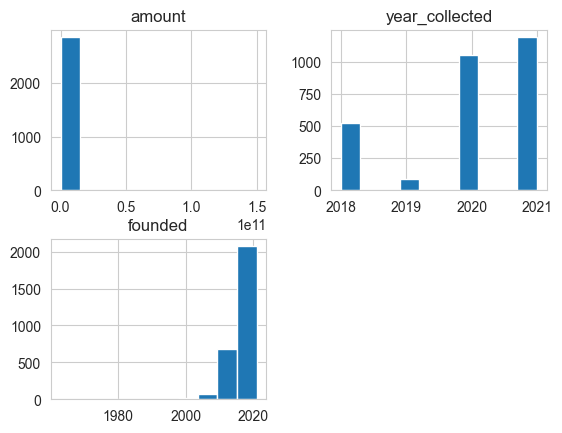

In [843]:
# plot histogram on the numerical columns 
df.hist()

<Axes: >

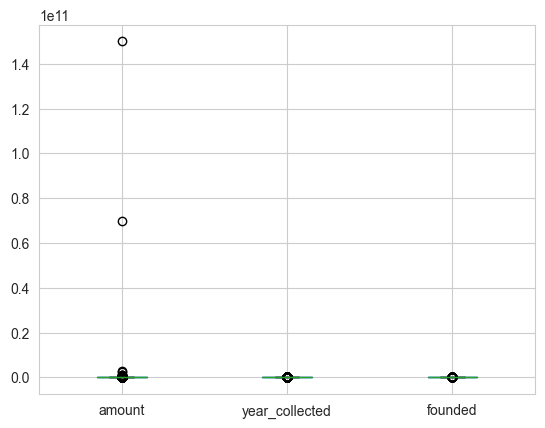

In [844]:
# box plot to check for outliers and the quartiles of the dataset
df.boxplot()

From the plot, we can identify quite a few number of outliers from the column

Hypothesis Testing

Hypothesis: Start-ups with multiple founders tend to raise significantly more money than those with a single founder

Null Hypothesis (HO): Start-ups with multiple founders raise significantly more money than those with a single founder </br>
Alternative Hypothesis (H1): Start-ups with multiple founders do not raise significantly more money than those with a single founder

In [845]:
#importing the necessary libraries
import scipy.stats as stats

# Count the number of founders for each startup
df['founders'] = df['founders'].str.count(',') + 1

#separate data to single founders and multiple founders
single_founders = df[df['founders']==1]['amount']
multiple_founders = df[df['founders'] > 1]['amount']

#conduct a two-tailed test to compare the two means of the mulitple and single founders
tstat, pval=stats.ttest_ind(single_founders, multiple_founders)

#setting the significant level of alpha=0.05 and interpret results of the t-test
alpha=0.05

if pval > alpha:
    print("Reject null hypothesis \n Startups with mulitple founders tend to attract more funding")
else:
    print("Do not reject null hypothesis \n Not enough evidence found that startups with mulitple founders tend to attract more funding than with single founders")

Reject null hypothesis 
 Startups with mulitple founders tend to attract more funding


In [846]:
# Distribution of Amount
amount_description = df['amount'].describe()
print("Distribution of Amount:")
print(amount_description)
print()

Distribution of Amount:
count    2.856000e+03
mean     9.834830e+07
std      3.097966e+09
min      8.770000e+02
25%      8.000000e+05
50%      2.743000e+06
75%      8.000000e+06
max      1.500000e+11
Name: amount, dtype: float64



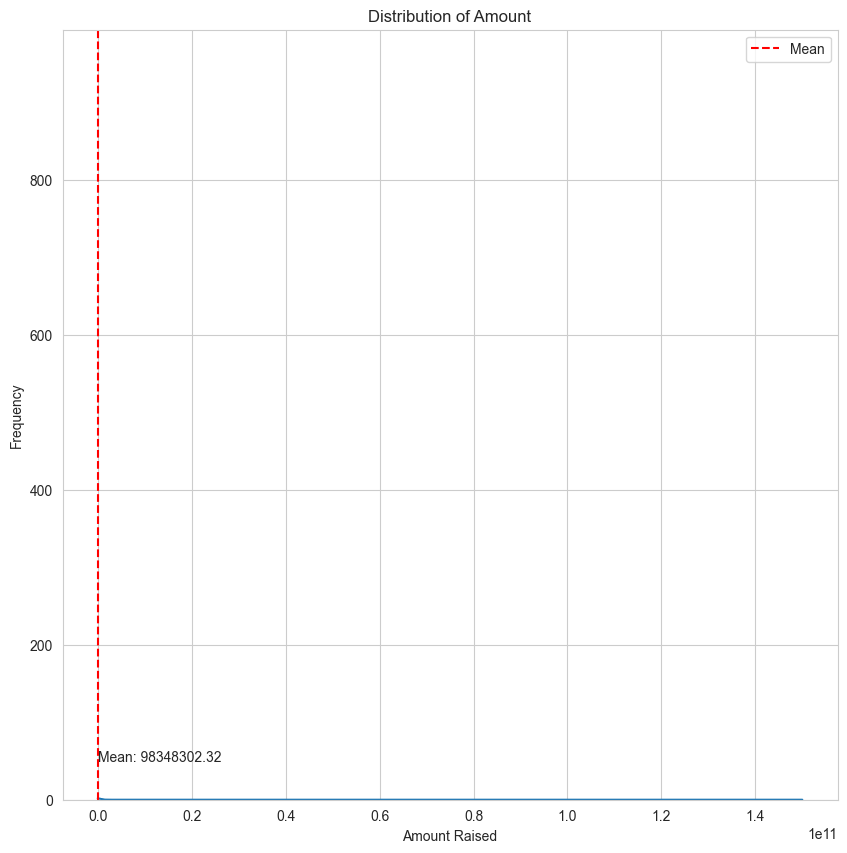

In [847]:
# Plot Distribution of Amount
plt.figure(figsize=(10, 10))
sns.histplot(df['amount'], kde=True)
plt.title('Distribution of Amount')
plt.xlabel('Amount Raised')
plt.ylabel('Frequency')


# Annotate the plot
plt.axvline(x=amount_description['mean'], color='red', linestyle='--', label='Mean')
plt.annotate(f"Mean: {amount_description['mean']:.2f}", 
             xy=(amount_description['mean'], 0), 
             xytext=(amount_description['mean'] + 500000, 50), 
             arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.legend()

# Set style to whitegrid
sns.set_style("whitegrid")

plt.show()

Count of Companies by Sector:
sector
IT & Technology               591
Education                     290
Financial Services            259
Healthcare & Life Sciences    229
Consumer Goods                227
Retail                        159
Media & Entertainment         138
Transportation & Logistics    126
Business Services             102
Agriculture                    84
Automotive                     81
Manufacturing                  73
Finance                        58
Consumables                    40
Logistics                      40
Real Estate                    38
Energy                         36
Consumer Services              36
FinTech                        31
Media/Entertainment            30
E-Commerce                     28
Travel & Tourism               26
Others                         20
Gaming                         18
Marketing                      15
Healthcare                     14
Sports                         13
Hospitality                    12
Other      

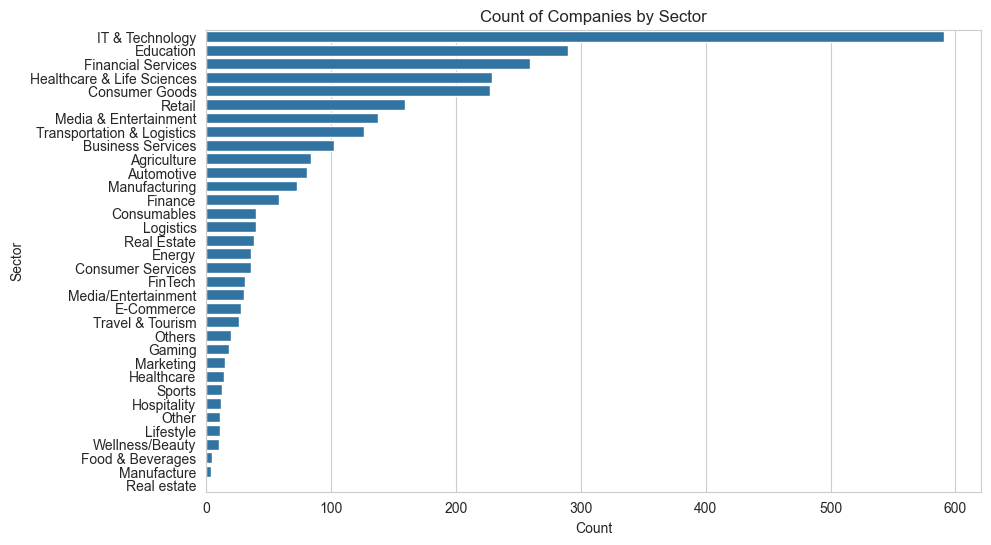

In [864]:
# Count of Companies by Sector
sector_counts = df['sector'].value_counts()
print("Count of Companies by Sector:")
print(sector_counts)
print()

# Plot Count of Companies by Sector
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='sector', order=sector_counts.index)
plt.title('Count of Companies by Sector')
plt.xlabel('Count')
plt.ylabel('Sector')

# Set style to whitegrid
sns.set_style("whitegrid")

plt.show()

In [865]:
df.head ()

,company/brand,stage,amount,headquarter,what_it_does,year_collected,investor,sector,founded,founders,founder_count
0,TheCollegeFever,Seed funding,250000.0,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",2018,Undisclosed,Marketing,2018.0,Unknown,0
1,Happy Cow Dairy,Seed funding,584709.0,Mumbai,A startup which aggregates milk from dairy far...,2018,Undisclosed,Agriculture,2018.0,Unknown,0
2,MyLoanCare,Series A,950153.0,Gurugram,Leading Online Loans Marketplace in India,2018,Undisclosed,Marketing,2018.0,Unknown,0
3,PayMe India,Seed funding,2000000.0,Noida,PayMe India is an innovative FinTech organizat...,2018,Undisclosed,FinTech,2018.0,Unknown,0
4,Eunimart,Seed funding,567354.0,Hyderabad,Eunimart is a one stop solution for merchants ...,2018,Undisclosed,Consumer Services,2018.0,Unknown,0


In [866]:
# Replace NaN values with a placeholder
df['founders'] = df['founders'].fillna('Unknown')
df.head()

,company/brand,stage,amount,headquarter,what_it_does,year_collected,investor,sector,founded,founders,founder_count
0,TheCollegeFever,Seed funding,250000.0,Bangalore,"TheCollegeFever is a hub for fun, fiesta and f...",2018,Undisclosed,Marketing,2018.0,Unknown,0
1,Happy Cow Dairy,Seed funding,584709.0,Mumbai,A startup which aggregates milk from dairy far...,2018,Undisclosed,Agriculture,2018.0,Unknown,0
2,MyLoanCare,Series A,950153.0,Gurugram,Leading Online Loans Marketplace in India,2018,Undisclosed,Marketing,2018.0,Unknown,0
3,PayMe India,Seed funding,2000000.0,Noida,PayMe India is an innovative FinTech organizat...,2018,Undisclosed,FinTech,2018.0,Unknown,0
4,Eunimart,Seed funding,567354.0,Hyderabad,Eunimart is a one stop solution for merchants ...,2018,Undisclosed,Consumer Services,2018.0,Unknown,0


In [867]:
# Replace NaN values with a placeholder and ensure the column is treated as a string
df['founder_count'] = df['founders'].fillna('Unknown').astype(str)

# Ensure all entries in the 'founders' column are strings and replace NaN values
df['founders'] = df['founders'].apply(lambda x: 'Unknown' if pd.isna(x) else str(x))

df['founders']

0       Unknown
1       Unknown
2       Unknown
3       Unknown
4       Unknown
         ...   
2851        2.0
2852        1.0
2853        2.0
2854        1.0
2855        2.0
Name: founders, Length: 2856, dtype: object

Count of Companies by Founder Count:
founder_count
1    2315
0     541
Name: count, dtype: int64


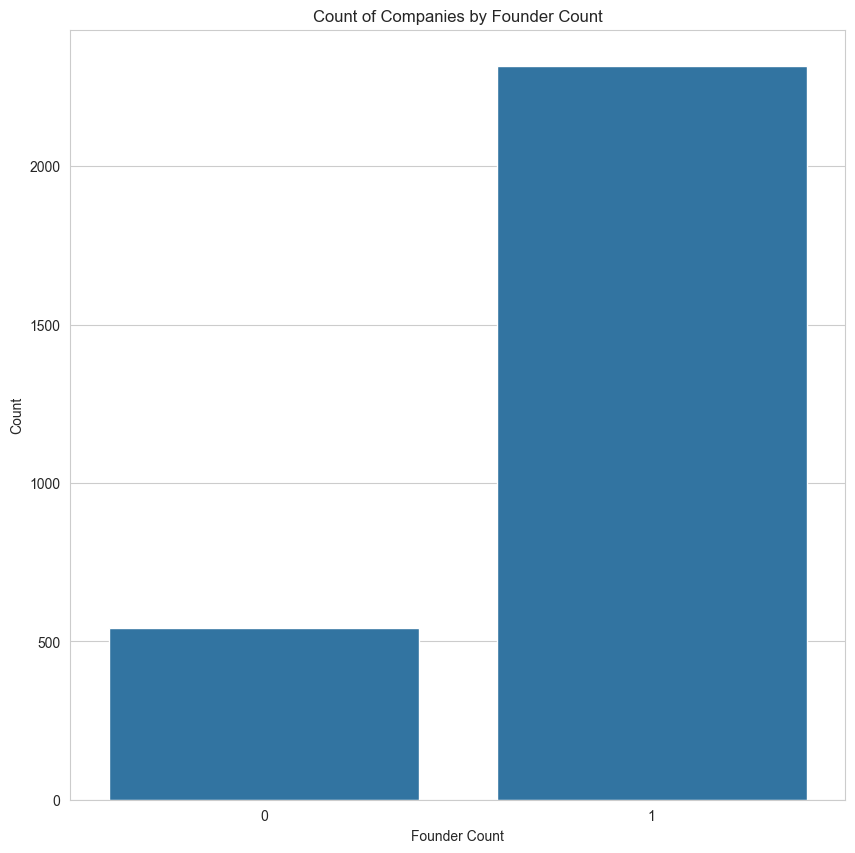

In [868]:
# Calculate the number of founders
# Function to safely calculate the number of founders
def count_founders(entry):
    if isinstance(entry, str) and entry != 'Unknown':
        return len(entry.split(','))
    else:
        return 0
    
# Apply the function to calculate the number of founders
df['founder_count'] = df['founders'].apply(count_founders)

# Count of Companies by Founder Count
founder_counts = df['founder_count'].value_counts()
print("Count of Companies by Founder Count:")
print(founder_counts)

# Plot Count of Companies by Founder Count
plt.figure(figsize=(10, 10))
sns.countplot(data=df, x='founder_count', order=sorted(df['founder_count'].unique()))
plt.title('Count of Companies by Founder Count')
plt.xlabel('Founder Count')
plt.ylabel('Count')

# Set style to whitegrid
sns.set_style("whitegrid")

plt.show()

Bivariate Analysis </br>

Relationship between founder count and amount

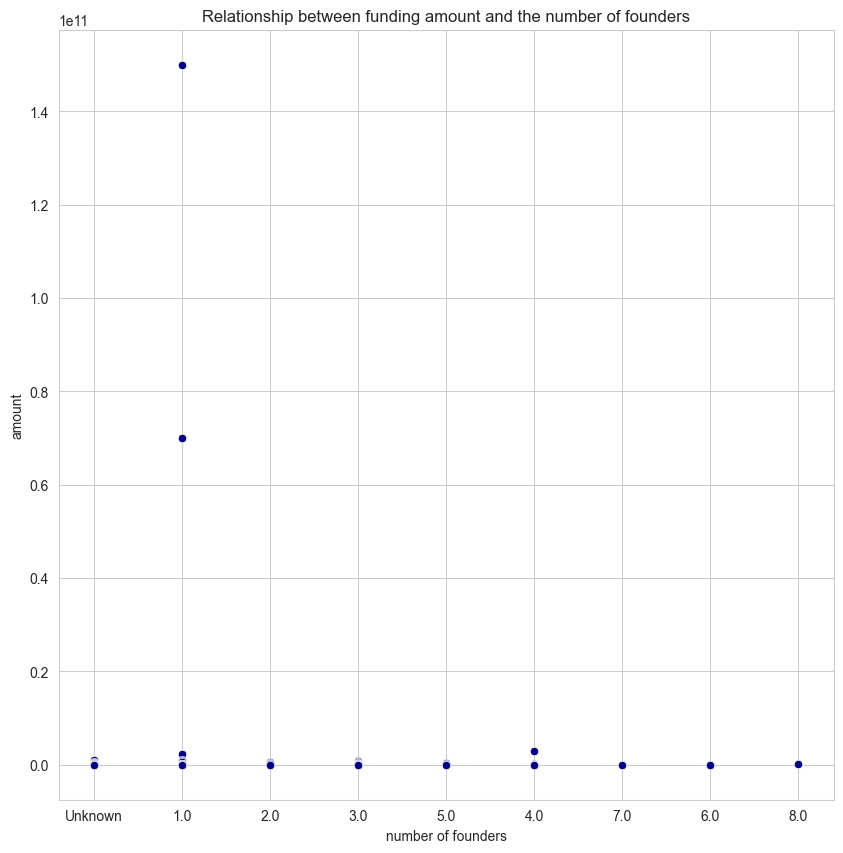

In [869]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 10))

sns.scatterplot(y='amount', x='founders', data=df, color='darkblue')
plt.title('Relationship between funding amount and the number of founders')
plt.ylabel('amount')
plt.xlabel('number of founders')

plt.show()

Relationship between Sector and Amount

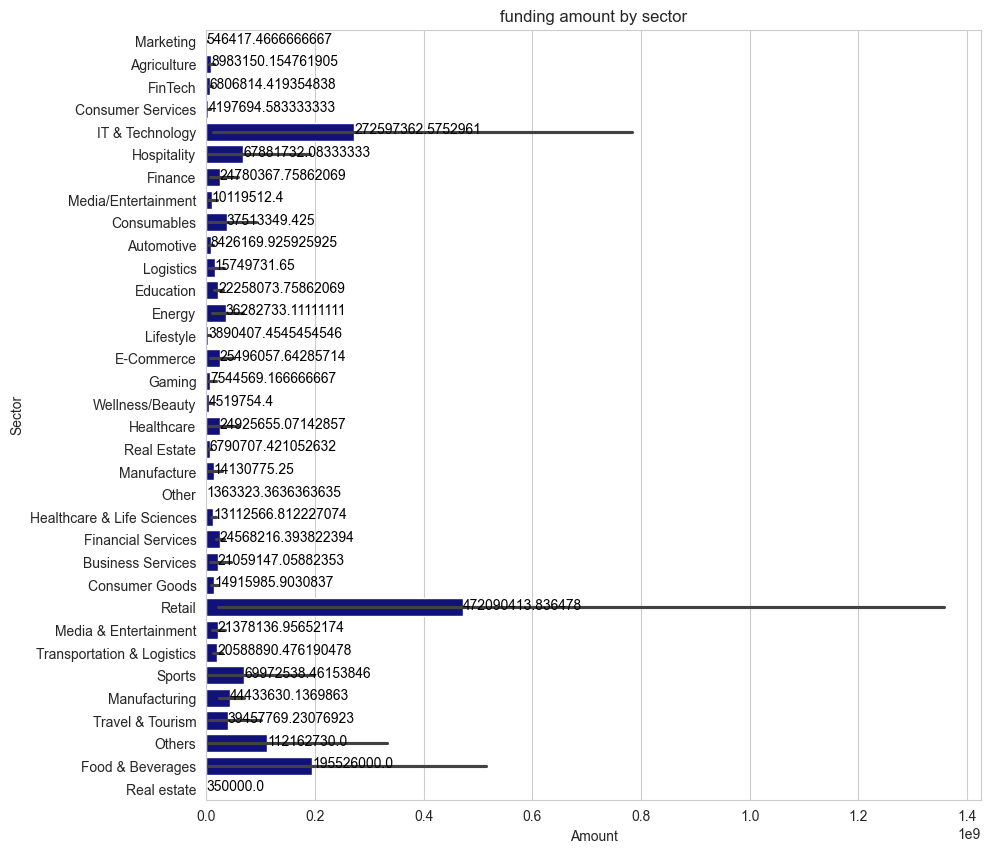

In [870]:
sector_amount = df.groupby('sector')['amount'].sum().reset_index()

sns.set_style('whitegrid')
plt.figure(figsize=(10,10))

ax=sns.barplot(x='amount', y='sector', data=df, color='darkblue', orient='h')
plt.title('funding amount by sector')
plt.xlabel('Amount')
plt.ylabel('Sector')

for p in ax.patches:
    ax.annotate(p.get_width(), (p.get_x() + p.get_width(), p.get_y() ), color='black', fontsize=10, ha='left', va='top')
plt.show()